## Personalized Cancer Diagnosis

**Featurization:** Tfidf Vectorizer with Top 1k tfidf value words.

### Exploratory Data Analysis(EDA)

In [1]:
#Importing all necessary libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### Reading Text Data

In [2]:
#Loading training_text.csv file.
data_text = pd.read_csv('training_text',sep='\|\|',header=None,skiprows=1,names=['ID','Text'],engine='python')
print("Number Data Points: ",data_text.shape[0])
print("Number Features: ",data_text.shape[1])
data_text.head()

Number Data Points:  3321
Number Features:  2


,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


**Text:** Clinical Literature data written by professional doctors.

**Reading Gene and Variation Feature**

In [3]:
#Loading training_variants.csv file.
data_var = pd.read_csv('training_variants')
print("Number of Data points: ",data_var.shape[0])
print("Number of Features: ",data_var.shape[1])
data_var.head()

Number of Data points:  3321
Number of Features:  4


,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


**ID:** the id of the row used to link the mutation to the clinical evidence.

**Gene:** the gene where this genetic mutation is located.

**Variation:** the aminoacid change for this mutations.

**Class:** 1-9 the class this genetic mutation has been classified on.

#### Text Preprocessing

In [4]:
#Loading the Stop words from nltk library.
import re
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        #Replace special chars with space
        total_text = re.sub('[^a-zA-Z0-9\n]',' ',total_text)
        #Replace Multiple spaces with single space.
        total_text = re.sub('\s+',' ',total_text)
        #Convert all upper case words to lower case.
        total_text = total_text.lower()
        
        for word in total_text.split():
            #If the word is not stop word then retain it, otherwise remove it.
            if not word in stop_words:
                string += word + " "
        
        data_text[column][index] = string

In [5]:
#Text Preprocessing stage.
for index,row in data_text.iterrows():
    nlp_preprocessing(row['Text'], index, 'Text')

In [6]:
#Now joining train_var_df and train_text_df using merge function.
data = pd.merge(data_var, data_text, how='left', on='ID')
data.head()

,ID,Gene,Variation,Class,Text
0,0,FAM58A,Truncating Mutations,1,cyclin dependent kinases cdks regulate variety...
1,1,CBL,W802*,2,abstract background non small cell lung cancer...
2,2,CBL,Q249E,2,abstract background non small cell lung cancer...
3,3,CBL,N454D,3,recent evidence demonstrated acquired uniparen...
4,4,CBL,L399V,4,oncogenic mutations monomeric casitas b lineag...


#### Train,Test and Cross Validation Split

In [7]:
from sklearn.model_selection import train_test_split
y_true = data['Class'].values
data.Gene = data.Gene.str.replace('\s+','_')
data.Variation = data.Variation.str.replace('\s+','_')
#Split the data as train and test 
X_1, X_test, y_1, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.2)
#Split the X_1 and y_1 into train and Cross validate
X_train, X_cv, y_train, y_cv = train_test_split(X_1, y_1, stratify=y_1, test_size=0.2)
print(X_1.head())

        ID   Gene           Variation  Class  \
784    784  ERBB4    EZR-ERBB4_Fusion      7   
2249  2249   PTEN                D24Y      4   
3170  3170   RAF1  SRGAP3-RAF1_Fusion      7   
1812  1812   RHOA                G14V      4   
2462  2462  BRCA1              V1713A      4   

                                                   Text  
784   purpose identify druggable oncogenic fusions i...  
2249  tumor suppressor gene phosphatase tensin homol...  
3170  pilocytic astrocytomas pas malignancy grade fr...  
1812  aitl common subtype cell lymphoma accounting 1...  
2462  genetic screening breast ovarian cancer suscep...  


In [8]:
print("Number of data points in Train data:",X_train.shape[0])
print("Number of data points in Cross validation data:",X_cv.shape[0])
print("Number of data points in Test data:",X_test.shape[0])

Number of data points in Train data: 2124
Number of data points in Cross validation data: 532
Number of data points in Test data: 665


#### Distribution of y_i's in Train,Test and Cross Validation datasets

In [9]:
#It returns a dict, keys as class labels and values as the no of data points in the class
train_class_distribution = X_train['Class'].value_counts().sortlevel()
cv_class_distribution = X_cv['Class'].value_counts().sortlevel()
test_class_distribution = X_test['Class'].value_counts().sortlevel()

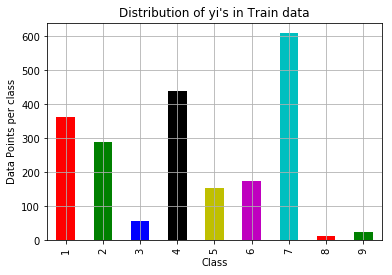

Number of data points in class 7 : 609 ( 28.672 %)
Number of data points in class 4 : 439 ( 20.669 %)
Number of data points in class 1 : 363 ( 17.09 %)
Number of data points in class 2 : 289 ( 13.606 %)
Number of data points in class 6 : 176 ( 8.286 %)
Number of data points in class 5 : 155 ( 7.298 %)
Number of data points in class 3 : 57 ( 2.684 %)
Number of data points in class 9 : 24 ( 1.13 %)
Number of data points in class 8 : 12 ( 0.565 %)


In [10]:
#Class distribution in Train Data.
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Train data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-train_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',train_class_distribution.values[i], '(', np.round((train_class_distribution.values[i]/X_train.shape[0]*100), 3), '%)')

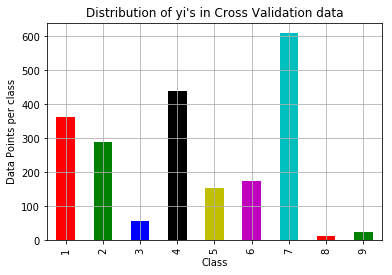

Number of data points in class 7 : 153 ( 28.759 %)
Number of data points in class 4 : 110 ( 20.677 %)
Number of data points in class 1 : 91 ( 17.105 %)
Number of data points in class 2 : 72 ( 13.534 %)
Number of data points in class 6 : 44 ( 8.271 %)
Number of data points in class 5 : 39 ( 7.331 %)
Number of data points in class 3 : 14 ( 2.632 %)
Number of data points in class 9 : 6 ( 1.128 %)
Number of data points in class 8 : 3 ( 0.564 %)


In [11]:
#Class distribution in Cross validation Data
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Cross Validation data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-cv_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',cv_class_distribution.values[i], '(', np.round((cv_class_distribution.values[i]/X_cv.shape[0]*100), 3), '%)')

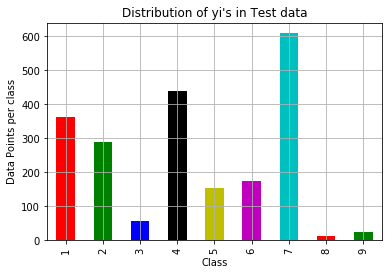

Number of data points in class 7 : 191 ( 28.722 %)
Number of data points in class 4 : 137 ( 20.602 %)
Number of data points in class 1 : 114 ( 17.143 %)
Number of data points in class 2 : 91 ( 13.684 %)
Number of data points in class 6 : 55 ( 8.271 %)
Number of data points in class 5 : 48 ( 7.218 %)
Number of data points in class 3 : 18 ( 2.707 %)
Number of data points in class 9 : 7 ( 1.053 %)
Number of data points in class 8 : 4 ( 0.602 %)


In [12]:
#Class Distribution in Test data
my_colors = 'rgbkymc'
train_class_distribution.plot(kind='bar', color=my_colors)
plt.xlabel('Class')
plt.ylabel('Data Points per class')
plt.title("Distribution of yi's in Test data")
plt.grid()
plt.show()

sorted_yi = np.argsort(-test_class_distribution.values)# -(train_class_distribution.values): the minus sign will give us in decreasing order
for i in sorted_yi:
    print('Number of data points in class', i+1, ':',test_class_distribution.values[i], '(', np.round((test_class_distribution.values[i]/X_test.shape[0]*100), 3), '%)')

### Prediction using a Random Model

* In a 'Random Model' we generate nine class probabilities randomly such that they sum to 1.

In [13]:
from sklearn.metrics import confusion_matrix
#This function plot the confusion matrix given y_true and y_pred
def plot_confusion_matrix(test_y,predict_y):
    
    C = confusion_matrix(test_y,predict_y)
    #C is 9x9 confusion matrix
    
    A = (((C.T)/(C.sum(axis=1))).T)
    #Divide each of the elements in a confusion matrix with sum of elements in that column.
    
    B = (C/C.sum(axis=1))
    #Divide each of the elements in a confusion matrix with sum of the elements in the row.
    
    labels = [1,2,3,4,5,6,7,8,9]
    #Represent C in heatmap format
    print("-"*50, "Confusion Matrix", "-"*50)
    plt.figure(figsize=(20,7))
    sns.heatmap(C, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent A in heatmap format
    print("-"*45, "Recall Matrix (Row Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(A, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()
    
    #Represent B in heatMap format
    print("-"*45, "Precision Matrix (Column Sum=1)", "-"*45)
    plt.figure(figsize=(20,7))
    sns.heatmap(B, annot=True, cmap="YlGnBu", fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.show()



Log loss on Cross Validation data using Random Model 2.5248901586387342
Log loss on Test Data using Random Model 2.5209914928626307
-------------------------------------------------- Confusion Matrix --------------------------------------------------


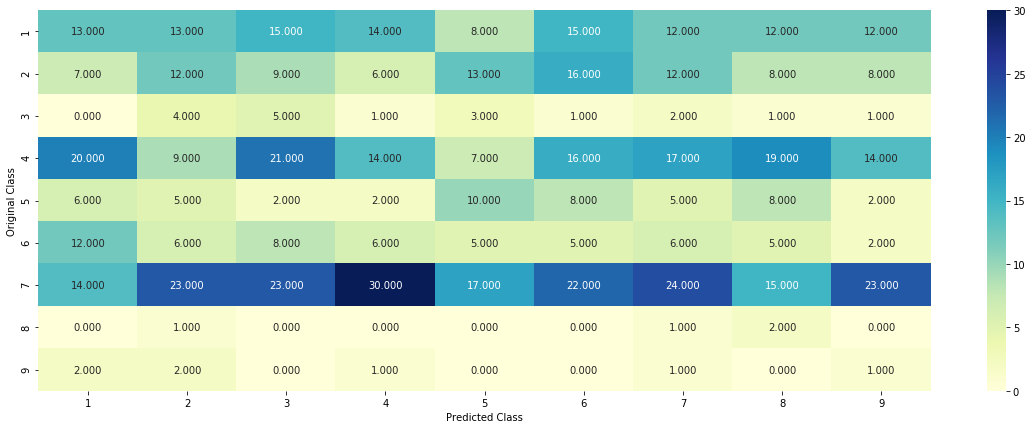

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


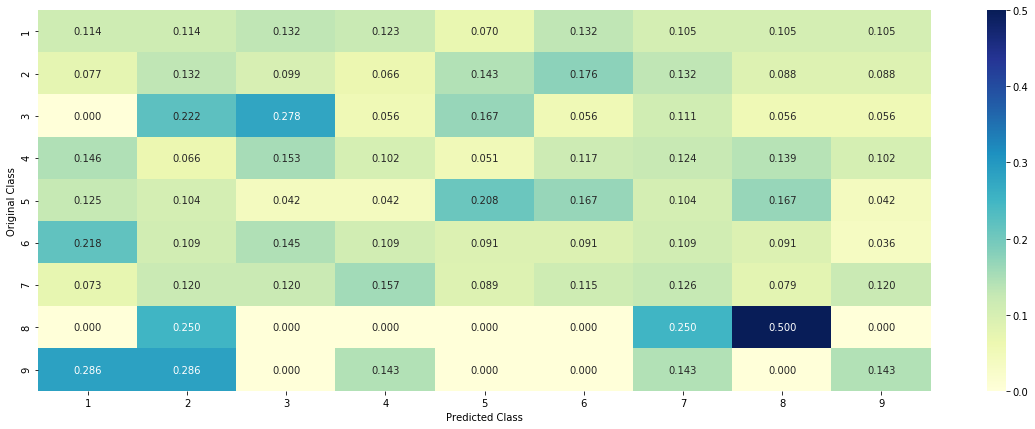

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


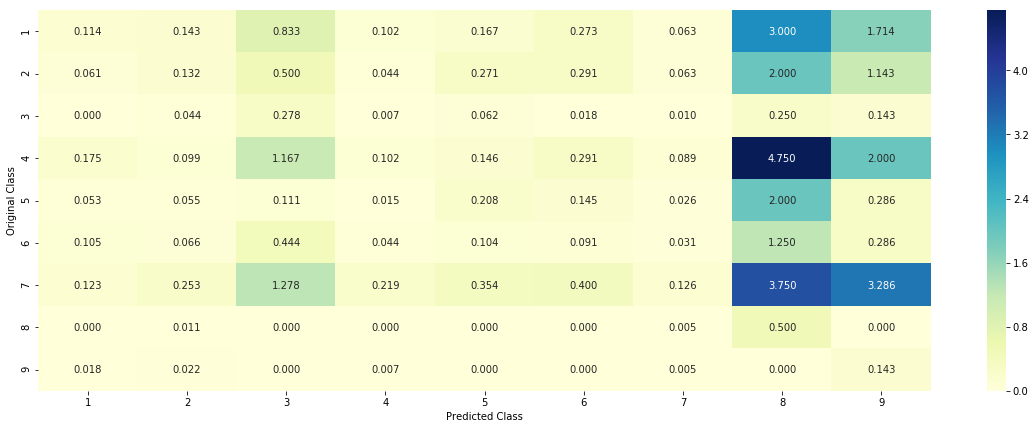

In [14]:
from sklearn.metrics.classification import log_loss
#Need to generate nine probabilities and sum of them is equal to 1.
#Solution is Generate Nine numbers and divide each of the numbers with their sum.
X_test_len = X_test.shape[0]
X_cv_len = X_cv.shape[0]

#We creat a output array that is exactly same as Cv data
y_cv_predicted = np.zeros((X_cv_len,9))
for i in range(X_cv_len):
    rand_probs = np.random.rand(1,9)
    y_cv_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Cross Validation data using Random Model", log_loss(y_cv, y_cv_predicted, eps=1e-15))

# Test-Set error.
#we create a output array that has exactly same as the test data
y_test_predicted = np.zeros((X_test_len,9))
for i in range(X_test_len):
    rand_probs = np.random.rand(1,9)
    y_test_predicted[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, y_test_predicted, eps=1e-15))

y_predicted = np.argmax(y_test_predicted,axis=1)
plot_confusion_matrix(y_test, y_predicted+1)

### Univariate Analysis

In [15]:
# code for response coding with Laplace smoothing.
# alpha : used for laplace smoothing
# feature: ['gene', 'variation']
# df: ['X_train', 'X_test', 'X_cv']
# algorithm
# -----------------------------------
# Consider all unique values and the number of occurances of given feature in train data dataframe
# build a vector (1*9) , the first element = (number of times it occured in class1 + 10*alpha / number of time it occurred in total data+90*alpha)
# gv_dict is like a look up table, for every gene it store a (1*9) representation of it
# for a value of feature in df:
# if it is in train data:
# we add the vector that was stored in 'gv_dict' look up table to 'gv_fea'
# if it is not there is train:
# we add [1/9, 1/9, 1/9, 1/9,1/9, 1/9, 1/9, 1/9, 1/9] to 'gv_fea'
# return 'gv_fea'
# ----------------------

# get_gv_fea_dict: Get Gene varaition Feature Dict
def get_gv_fea_dict(alpha, feature, df):
    # value_count: it contains a dict like
    # print(train_df['Gene'].value_counts())
    # output:
    #        {BRCA1      174
    #         TP53       106
    #         EGFR        86
    #         BRCA2       75
    #         PTEN        69
    #         KIT         61
    #         BRAF        60
    #         ERBB2       47
    #         PDGFRA      46
    #         ...}
    # print(train_df['Variation'].value_counts())
    # output:
    # {
    # Truncating_Mutations                     63
    # Deletion                                 43
    # Amplification                            43
    # Fusions                                  22
    # Overexpression                            3
    # E17K                                      3
    # Q61L                                      3
    # S222D                                     2
    # P130S                                     2
    # ...
    # }
    value_count = X_train[feature].value_counts()
    
    # gv_dict : Gene Variation Dict, which contains the probability array for each gene/variation
    gv_dict = dict()
    
    # denominator will contain the number of time that particular feature occured in whole data
    for i, denominator in value_count.items():
        # vec will contain (p(yi==1/Gi) probability of gene/variation belongs to perticular class
        # vec is 9 diamensional vector
        vec = []
        for k in range(1,10):
            # print(train_df.loc[(train_df['Class']==1) & (train_df['Gene']=='BRCA1')])
            #         ID   Gene             Variation  Class  
            # 2470  2470  BRCA1                S1715C      1   
            # 2486  2486  BRCA1                S1841R      1   
            # 2614  2614  BRCA1                   M1R      1   
            # 2432  2432  BRCA1                L1657P      1   
            # 2567  2567  BRCA1                T1685A      1   
            # 2583  2583  BRCA1                E1660G      1   
            # 2634  2634  BRCA1                W1718L      1   
            # cls_cnt.shape[0] will return the number of rows

            cls_cnt = X_train.loc[(X_train['Class']==k) & (X_train[feature]==i)]
            
            # cls_cnt.shape[0](numerator) will contain the number of time that particular feature occured in whole data
            vec.append((cls_cnt.shape[0] + alpha*10)/ (denominator + 90*alpha))

        # we are adding the gene/variation to the dict as key and vec as value
        gv_dict[i]=vec
    return gv_dict

# Get Gene variation feature
def get_gv_feature(alpha, feature, df):
    # print(gv_dict)
    #     {'BRCA1': [0.20075757575757575, 0.03787878787878788, 0.068181818181818177, 0.13636363636363635, 0.25, 0.19318181818181818, 0.03787878787878788, 0.03787878787878788, 0.03787878787878788], 
    #      'TP53': [0.32142857142857145, 0.061224489795918366, 0.061224489795918366, 0.27040816326530615, 0.061224489795918366, 0.066326530612244902, 0.051020408163265307, 0.051020408163265307, 0.056122448979591837], 
    #      'EGFR': [0.056818181818181816, 0.21590909090909091, 0.0625, 0.068181818181818177, 0.068181818181818177, 0.0625, 0.34659090909090912, 0.0625, 0.056818181818181816], 
    #      'BRCA2': [0.13333333333333333, 0.060606060606060608, 0.060606060606060608, 0.078787878787878782, 0.1393939393939394, 0.34545454545454546, 0.060606060606060608, 0.060606060606060608, 0.060606060606060608], 
    #      'PTEN': [0.069182389937106917, 0.062893081761006289, 0.069182389937106917, 0.46540880503144655, 0.075471698113207544, 0.062893081761006289, 0.069182389937106917, 0.062893081761006289, 0.062893081761006289], 
    #      'KIT': [0.066225165562913912, 0.25165562913907286, 0.072847682119205295, 0.072847682119205295, 0.066225165562913912, 0.066225165562913912, 0.27152317880794702, 0.066225165562913912, 0.066225165562913912], 
    #      'BRAF': [0.066666666666666666, 0.17999999999999999, 0.073333333333333334, 0.073333333333333334, 0.093333333333333338, 0.080000000000000002, 0.29999999999999999, 0.066666666666666666, 0.066666666666666666],
    #      ...
    #     }
    gv_dict = get_gv_fea_dict(alpha, feature, df)
    # value_count is similar in get_gv_fea_dict
    value_count = X_train[feature].value_counts()
    
    # gv_fea: Gene_variation feature, it will contain the feature for each feature value in the data
    gv_fea = []
    # for every feature values in the given data frame we will check if it is there in the train data then we will add the feature to gv_fea
    # if not we will add [1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9] to gv_fea
    for index, row in df.iterrows():
        if row[feature] in dict(value_count).keys():
            gv_fea.append(gv_dict[row[feature]])
        else:
            gv_fea.append([1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9,1/9])
#             gv_fea.append([-1,-1,-1,-1,-1,-1,-1,-1,-1])
    return gv_fea

### Univariate Analysis on Gene feature

**1. What Type of the Feature it is?**
* Categorical Feature

**2. How many Categories are there and How they are distributed?**

In [16]:
unique_genes = X_train['Gene'].value_counts()
print("Number of unique genes:", unique_genes.shape[0])
print(unique_genes.head(10)) #Prints Top 10 Most occuring genes.

Number of unique genes: 236
BRCA1     162
TP53      113
EGFR       88
PTEN       84
BRCA2      79
BRAF       65
KIT        61
ERBB2      45
ALK        43
PDGFRA     40
Name: Gene, dtype: int64


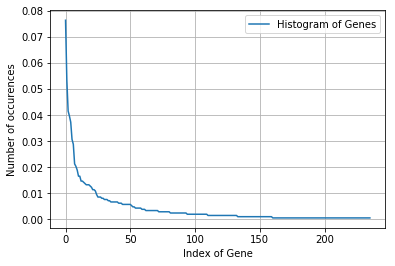

In [17]:
#Gene Distribution (Histogram)
s = sum(unique_genes.values)
h = unique_genes.values/s
plt.plot(h, label="Histogram of Genes")
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.legend()
plt.grid()
plt.show()

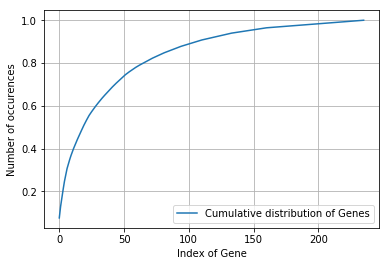

In [18]:
#Cummulative distribution of genes.
c = np.cumsum(h)
plt.plot(c, label='Cumulative distribution of Genes')
plt.xlabel("Index of Gene")
plt.ylabel("Number of occurences")
plt.grid()
plt.legend()
plt.show()

**3.How to Featurize this Gene feature?**
* Tfidf Vectorizer

We will choose the appropriate featurization based on the ML model we use. For this problem of multi-class classification with categorical features, tfidf vectorizer is used for all the models.

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer
#Tfidf Vectorizer of the gene feature.
gene_tfidfVectorizer = TfidfVectorizer()
train_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.fit_transform(X_train['Gene'])
cv_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.transform(X_cv['Gene'])
test_gene_feature_tfidfVectorizer = gene_tfidfVectorizer.transform(X_test['Gene'])

In [20]:
#Lets cross check the shape of the data frame
print("The shape of the train_gene_feature_tfidfVectorizer", train_gene_feature_tfidfVectorizer.shape)
print("The shape of the cv_gene_feature_tfidfVectorizer", cv_gene_feature_tfidfVectorizer.shape)
print("The shape of the test_gene_feature_tfidfVectorizer", test_gene_feature_tfidfVectorizer.shape)

The shape of the train_gene_feature_tfidfVectorizer (2124, 236)
The shape of the cv_gene_feature_tfidfVectorizer (532, 236)
The shape of the test_gene_feature_tfidfVectorizer (665, 236)


**4.How good is this feature in predicting y_i's?**

There are Many ways to check it but simplest way is to build a simple Machine Learning Model.

For values of alpha =  1e-05 The log loss is: 1.484524813615904
For values of alpha =  0.0001 The log loss is: 1.2984484863189576
For values of alpha =  0.001 The log loss is: 1.3103247405351388
For values of alpha =  0.01 The log loss is: 1.428144104078121
For values of alpha =  0.1 The log loss is: 1.505249781325467
For values of alpha =  1 The log loss is: 1.5307762622956365


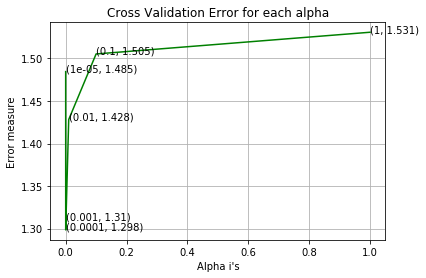

For values of best alpha =  0.0001 The train log loss is: 1.042374521459613
For values of best alpha =  0.0001 The cross validation log loss is: 1.2984484863189576
For values of best alpha =  0.0001 The test log loss is: 1.1737408445938964


In [21]:
#SGD Classifier.
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
import warnings
warnings.filterwarnings("ignore")
#Hyper parameter for SGD classifier
alpha = [10**x for x in range(-5,1)]

cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_gene_feature_tfidfVectorizer, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_gene_feature_tfidfVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_gene_feature_tfidfVectorizer)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_gene_feature_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_gene_feature_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_gene_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**5. Gene Feature stable across all the dataset(Train,Test and CV)**
* Yes, it is. Otherwise, the CV and Test errors would be significantly more than train error.

In [22]:
print("Q6. How many data points in Test and CV datasets are covered by the ", unique_genes.shape[0], " genes in train dataset?")

test_coverage=X_test[X_test['Gene'].isin(list(set(X_train['Gene'])))].shape[0]
cv_coverage=X_cv[X_cv['Gene'].isin(list(set(X_train['Gene'])))].shape[0]

print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q6. How many data points in Test and CV datasets are covered by the  236  genes in train dataset?
Ans
1. In test data 649 out of 665 : 97.59398496240601
2. In cross validation data 514 out of  532 : 96.61654135338345


### Univariate analysis on Variation Feature

**Q1. What type of the Feature it is?**
* It is Categorical feature.

**Q2. How many Categories are there?**

In [23]:
unique_variations = X_train['Variation'].value_counts()
print('Number of Unique Variations :', unique_variations.shape[0])
# the top 10 variations that occured most
print(unique_variations.head(10))

Number of Unique Variations : 1932
Truncating_Mutations    60
Amplification           48
Deletion                40
Fusions                 21
Overexpression           5
Q61R                     3
E17K                     3
G12V                     3
G13C                     2
Y42C                     2
Name: Variation, dtype: int64


In [24]:
print("Ans: There are", unique_variations.shape[0])

Ans: There are 1932


Different categories of variations in the train data, and they are distibuted as follows

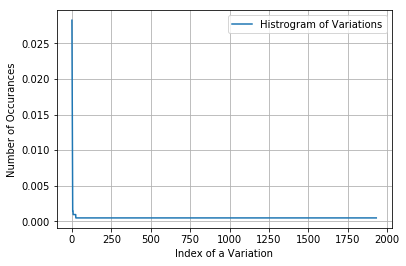

In [25]:
s = sum(unique_variations.values);
h = unique_variations.values/s;
plt.plot(h, label="Histrogram of Variations")
plt.xlabel('Index of a Variation')
plt.ylabel('Number of Occurances')
plt.legend()
plt.grid()
plt.show()

[0.02824859 0.05084746 0.06967985 ... 0.99905838 0.99952919 1.        ]


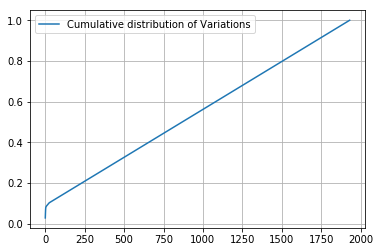

In [26]:
c = np.cumsum(h)
print(c)
plt.plot(c,label='Cumulative distribution of Variations')
plt.grid()
plt.legend()
plt.show()

**Q3. How to featurize the Variation Feature?**
* Tfidf Vectorizer

We will use both of the methods to featurize variation feature.

In [27]:
# Tfidf Vectorizer of variation feature.
variation_tfidfVectorizer = TfidfVectorizer()
train_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.fit_transform(X_train['Variation'])
test_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.transform(X_test['Variation'])
cv_variation_feature_tfidfVectorizer = variation_tfidfVectorizer.transform(X_cv['Variation'])

In [28]:
print("The shape of train_variation_feature_tfidfVectorizer is",train_variation_feature_tfidfVectorizer.shape)
print("The shape of cv_variation_feature_tfidfVectorizer is",cv_variation_feature_tfidfVectorizer.shape)
print("The shape of test_variation_feature_tfidfVectorizer is",test_variation_feature_tfidfVectorizer.shape)

The shape of train_variation_feature_tfidfVectorizer is (2124, 1964)
The shape of cv_variation_feature_tfidfVectorizer is (532, 1964)
The shape of test_variation_feature_tfidfVectorizer is (665, 1964)


**Q4. How good is that variation feature in predicting y_i's?**


For values of alpha =  1e-05 The log loss is: 1.701898318305767
For values of alpha =  0.0001 The log loss is: 1.6886034473037852
For values of alpha =  0.001 The log loss is: 1.68917432498579
For values of alpha =  0.01 The log loss is: 1.6955543884583801
For values of alpha =  0.1 The log loss is: 1.7141917532363231
For values of alpha =  1 The log loss is: 1.7165741663305674


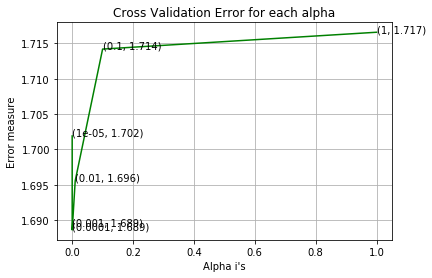

For values of best alpha =  0.0001 The train log loss is: 0.7625890202658604
For values of best alpha =  0.0001 The cross validation log loss is: 1.6886034473037852
For values of best alpha =  0.0001 The test log loss is: 1.7034074312822844


In [29]:
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_variation_feature_tfidfVectorizer, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_variation_feature_tfidfVectorizer, y_train)
    predict_y = sig_clf.predict_proba(cv_variation_feature_tfidfVectorizer)
    
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_variation_feature_tfidfVectorizer, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_variation_feature_tfidfVectorizer, y_train)

predict_y = sig_clf.predict_proba(train_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_variation_feature_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Observation:**
* Log loss is less than Random models log loss which is 2.5
* This is an important Feature. 

**Q5. Is this Variation is Stable across all the Data sets(Train, CV and Test)?**

In [30]:
print("Q12. How many data points are covered by total ", unique_variations.shape[0], " genes in test and cross validation data sets?")
test_coverage=X_test[X_test['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
cv_coverage=X_cv[X_cv['Variation'].isin(list(set(X_train['Variation'])))].shape[0]
print('Ans\n1. In test data',test_coverage, 'out of',X_test.shape[0], ":",(test_coverage/X_test.shape[0])*100)
print('2. In cross validation data',cv_coverage, 'out of ',X_cv.shape[0],":" ,(cv_coverage/X_cv.shape[0])*100)

Q12. How many data points are covered by total  1932  genes in test and cross validation data sets?
Ans
1. In test data 68 out of 665 : 10.225563909774436
2. In cross validation data 60 out of  532 : 11.278195488721805


**Observation:**
* Around 10% of the data is common between Train and CV and also Train and Test.
* This feature is less stable but it is useful feature.

### Univariate Analysis on Text data

**Q1. How Many Words are there in Train data?**

**Q2. How are Words frequencies distributed?**

**Q3. How to featurize the Text data?**

**Q4. Is the Text feature is useful in predicting y_i's?**

**Q5. Is the Text Feature stable across Train, cv and Test?**

In [31]:
# cls_text is a data frame
# for every row in data fram consider the 'TEXT'
# split the words by space
# make a dict with those words
# increment its count whenever we see that word
from collections import defaultdict

def extract_dictionary_paddle(cls_text):
    dictionary = defaultdict(int)
    for index, row in cls_text.iterrows():
        for word in row['Text'].split():
            dictionary[word] +=1
    return dictionary

In [32]:
import math
#https://stackoverflow.com/a/1602964
def get_text_responsecoding(df):
    text_feature_responseCoding = np.zeros((df.shape[0],9))
    for i in range(0,9):
        row_index = 0
        for index, row in df.iterrows():
            sum_prob = 0
            for word in row['Text'].split():
                sum_prob += math.log(((dict_list[i].get(word,0)+10 )/(total_dict.get(word,0)+90)))
            text_feature_responseCoding[row_index][i] = math.exp(sum_prob/len(row['Text'].split()))
            row_index += 1
    return text_feature_responseCoding

#### Train Text:

In [72]:
# building a tfidfVectorizer with all the words that occured atleast 2 times in train data
text_tfidfVectorizer = TfidfVectorizer(min_df=2)
train_text_feature_tfidfVectorizer = text_tfidfVectorizer.fit_transform(X_train['Text'])
# getting all the feature names (words)
train_text_features= text_tfidfVectorizer.get_feature_names()
print("Total number of unique words in train data :", len(train_text_features))

# train_text_feature_tfidfVectorizer.sum(axis=0).A1 will sum every row and returns (1*number of features) vector
train_text_fea_counts = train_text_feature_tfidfVectorizer.sum(axis=0).A1

# zip(list(text_features),text_fea_counts) will zip a word with its number of times it occured
text_fea_dict = dict(zip(list(train_text_features),train_text_fea_counts))

#---------------------------------------------------------------------------------------------------------------------
# we use the same vectorizer that was trained on train data
test_text_feature_tfidfVectorizer = text_tfidfVectorizer.transform(X_test['Text'])
test_text_features= text_tfidfVectorizer.get_feature_names()
print("The Number of Features in Test data is ",len(test_text_features))

#----------------------------------------------------------------------------------------------------------------------
# we use the same vectorizer that was trained on train data
cv_text_feature_tfidfVectorizer = text_tfidfVectorizer.transform(X_cv['Text'])
cv_text_features= text_tfidfVectorizer.get_feature_names()
print("The Number of Features in Cross Validation data is ",len(cv_text_features))


Total number of unique words in train data : 70014
The Number of Features in Test data is  70014
The Number of Features in Cross Validation data is  70014


In [73]:
type(train_text_features)

list

In [74]:
type(train_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [75]:
def top_tfidf_feats(row, features, top_n=1000):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    #print(topn_ids)
    top_feats = [( train_text_features.index(features[i]), features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['column_no','feature', 'tfidf']
    return df

In [76]:
def top_mean_feats(Xtr, features, grp_ids=None, top_n=1000):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    #D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    print(tfidf_means)
    return top_tfidf_feats(tfidf_means, features, top_n)


In [77]:
top_tfidf = top_mean_feats(train_text_feature_tfidfVectorizer, train_text_features, grp_ids=None, top_n=1000 )
print(top_tfidf.head(10))
print(type(top_tfidf))

[4.08969849e-03 4.28607840e-03 1.49389082e-05 ... 1.12140492e-05
 1.33465212e-05 3.69829700e-05]
   column_no    feature     tfidf
0      43887  mutations  0.072214
1      13865      brca1  0.049984
2      16218      cells  0.045765
3      67423   variants  0.037859
4      26918        fig  0.034774
5      43862   mutation  0.032411
6      16197       cell  0.031905
7       9251         al  0.031450
8      25413         et  0.031384
9      52620       pten  0.031144
<class 'pandas.core.frame.DataFrame'>


In [78]:
print(top_tfidf['column_no'][1])

13865


In [79]:
print(type(train_text_feature_tfidfVectorizer))

<class 'scipy.sparse.csr.csr_matrix'>


In [80]:
train_text_feature_tfidfVectorizer_df = pd.DataFrame(train_text_feature_tfidfVectorizer.toarray())
type(train_text_feature_tfidfVectorizer_df)

pandas.core.frame.DataFrame

In [81]:
train_text_feature_tfidfVectorizer_df.shape

(2124, 70014)

In [82]:
print(train_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][1]])

[0.30233661 0.         0.         ... 0.         0.         0.60840992]


In [83]:
#from scipy.sparse import vstack
train_text_feature_tfidfVectorizer_1 = [0] * 2124
for i in range(1000):
    train_text_feature_tfidfVectorizer_1 = np.column_stack((train_text_feature_tfidfVectorizer_1, train_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][i]]))
    
            

In [84]:
train_text_feature_tfidfVectorizer_1.shape

(2124, 1001)

In [85]:
type(train_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [86]:
train_text_feature_tfidfVectorizer_1 = train_text_feature_tfidfVectorizer_1[:,1:1001]

In [87]:
print(train_text_feature_tfidfVectorizer_1)

[[0.04579243 0.30233661 0.01212461 ... 0.00799056 0.00489747 0.        ]
 [0.03146658 0.         0.04854491 ... 0.         0.         0.01107933]
 [0.01187898 0.         0.04780756 ... 0.         0.         0.00224066]
 ...
 [0.09656963 0.         0.06504939 ... 0.00135664 0.         0.00144076]
 [0.2467439  0.         0.05573148 ... 0.0016695  0.         0.        ]
 [0.03588042 0.60840992 0.06099766 ... 0.         0.         0.        ]]


In [88]:
dict_list = []
# dict_list =[] contains 9 dictoinaries each corresponds to a class
for i in range(1,10):
    cls_text = X_train[X_train['Class']==i]
    # build a word dict based on the words in that class
    dict_list.append(extract_dictionary_paddle(cls_text))
    # append it to dict_list

# dict_list[i] is build on i'th  class text data
# total_dict is buid on whole training text data
total_dict = extract_dictionary_paddle(X_train)


confuse_array = []
for i in train_text_features:
    ratios = []
    max_val = -1
    for j in range(0,9):
        ratios.append((dict_list[j][i]+10 )/(total_dict[i]+90))
    confuse_array.append(ratios)
confuse_array = np.array(confuse_array)

#### Test Text:

In [89]:
type(test_text_features)

list

In [90]:
type(test_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [91]:
def top_tfidf_feats(row, features, top_n=1000):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    #print(topn_ids)
    top_feats = [( test_text_features.index(features[i]), features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['column_no','feature', 'tfidf']
    return df

In [92]:
def top_mean_feats(Xtr, features, grp_ids=None, top_n=1000):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    #D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    print(tfidf_means)
    return top_tfidf_feats(tfidf_means, features, top_n)


In [93]:
top_tfidf = top_mean_feats(test_text_feature_tfidfVectorizer, test_text_features, grp_ids=None, top_n=1000 )
print(top_tfidf.head(10))
print(type(top_tfidf))

[5.07695596e-03 4.40029561e-03 1.58243073e-05 ... 2.15560823e-05
 0.00000000e+00 0.00000000e+00]
   column_no    feature     tfidf
0      43887  mutations  0.077964
1      13865      brca1  0.050241
2      16218      cells  0.045747
3      43862   mutation  0.035171
4      67423   variants  0.035143
5      26918        fig  0.034426
6       9251         al  0.032933
7      25413         et  0.032896
8      15044     cancer  0.032050
9      16197       cell  0.031848
<class 'pandas.core.frame.DataFrame'>


In [94]:
print(top_tfidf['column_no'][1])

13865


In [95]:
print(type(test_text_feature_tfidfVectorizer))

<class 'scipy.sparse.csr.csr_matrix'>


In [96]:
test_text_feature_tfidfVectorizer_df = pd.DataFrame(test_text_feature_tfidfVectorizer.toarray())
type(test_text_feature_tfidfVectorizer_df)

pandas.core.frame.DataFrame

In [97]:
test_text_feature_tfidfVectorizer_df.shape

(665, 70014)

In [98]:
print(test_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][1]])

[0.         0.         0.         0.         0.45786742 0.
 0.         0.         0.         0.         0.         0.
 0.         0.0049538  0.00632269 0.         0.02842217 0.
 0.         0.         0.         0.         0.         0.
 0.60840992 0.59998428 0.         0.03010473 0.         0.
 0.03163222 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.25049744
 0.         0.         0.         0.         0.         0.
 0.60840992 0.         0.         0.         0.00230158 0.59998428
 0.         0.         0.         0.45641905 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.0049538  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.18107734
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.14552601 0.       

In [100]:
#from scipy.sparse import vstack
test_text_feature_tfidfVectorizer_1 = [0] * 665
for i in range(1000):
    test_text_feature_tfidfVectorizer_1 = np.column_stack((test_text_feature_tfidfVectorizer_1, test_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][i]]))
    
            

In [101]:
test_text_feature_tfidfVectorizer_1.shape

(665, 1001)

In [102]:
type(test_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [103]:
test_text_feature_tfidfVectorizer_1 = test_text_feature_tfidfVectorizer_1[:,1:1001]

In [104]:
print(test_text_feature_tfidfVectorizer_1)

[[0.17290014 0.         0.02899357 ... 0.00110209 0.         0.        ]
 [0.02539059 0.         0.09340416 ... 0.04976661 0.         0.        ]
 [0.02229448 0.         0.10254318 ... 0.01498221 0.         0.        ]
 ...
 [0.06163008 0.         0.04812589 ... 0.00288472 0.00147943 0.01683317]
 [0.09901271 0.         0.06113073 ... 0.00352853 0.         0.        ]
 [0.07986193 0.         0.04413708 ... 0.         0.         0.        ]]


#### Cross Validation Text:

In [105]:
type(cv_text_features)

list

In [106]:
type(cv_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [107]:
def top_tfidf_feats(row, features, top_n=1000):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    #print(topn_ids)
    top_feats = [( cv_text_features.index(features[i]), features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['column_no','feature', 'tfidf']
    return df

In [108]:
def top_mean_feats(Xtr, features, grp_ids=None, top_n=1000):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    #D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    print(tfidf_means)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [109]:
top_tfidf = top_mean_feats(cv_text_feature_tfidfVectorizer, cv_text_features, grp_ids=None, top_n=1000 )
print(top_tfidf.head(10))
print(type(top_tfidf))

[3.05185590e-03 3.86735858e-03 1.84301546e-05 ... 1.52581621e-05
 2.43681928e-05 1.34977360e-05]
   column_no    feature     tfidf
0      43887  mutations  0.072527
1      13865      brca1  0.062855
2      16218      cells  0.045941
3      67423   variants  0.038395
4      26918        fig  0.037143
5      15044     cancer  0.034612
6      24185       egfr  0.034251
7      43862   mutation  0.033351
8      16197       cell  0.033163
9       9251         al  0.032466
<class 'pandas.core.frame.DataFrame'>


In [110]:
print(top_tfidf['column_no'][1])

13865


In [111]:
print(type(cv_text_feature_tfidfVectorizer))

<class 'scipy.sparse.csr.csr_matrix'>


In [112]:
cv_text_feature_tfidfVectorizer_df = pd.DataFrame(cv_text_feature_tfidfVectorizer.toarray())
type(cv_text_feature_tfidfVectorizer_df)

pandas.core.frame.DataFrame

In [113]:
cv_text_feature_tfidfVectorizer_df.shape

(532, 70014)

In [114]:
print(cv_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][1]])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 3.88476330e-01 0.00000000e+00 1.01750253e-01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.61095042e-03 0.00000000e+00 0.00000000e+00
 6.08409916e-01 0.00000000e+00 4.95379893e-03 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 6.08409916e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 4.34710923e-03 0.00000000e+00 3.41530048e-03 0.00000000e+00
 2.75914471e-01 7.41781411e-03 0.00000000e+00 7.26887904e-01
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.000000

In [115]:
#from scipy.sparse import vstack
cv_text_feature_tfidfVectorizer_1 = [0] * 532
for i in range(1000):
    cv_text_feature_tfidfVectorizer_1 = np.column_stack((cv_text_feature_tfidfVectorizer_1, cv_text_feature_tfidfVectorizer_df.values[:,top_tfidf['column_no'][i]]))
    
            

In [116]:
cv_text_feature_tfidfVectorizer_1.shape

(532, 1001)

In [117]:
type(cv_text_feature_tfidfVectorizer)

scipy.sparse.csr.csr_matrix

In [118]:
cv_text_feature_tfidfVectorizer_1 = cv_text_feature_tfidfVectorizer_1[:,1:1001]

In [119]:
print(cv_text_feature_tfidfVectorizer_1)

[[0.19444927 0.         0.0160363  ... 0.         0.         0.        ]
 [0.02389606 0.         0.03510239 ... 0.         0.00177415 0.        ]
 [0.00313658 0.         0.02524667 ... 0.         0.         0.        ]
 ...
 [0.07741833 0.         0.02880993 ... 0.         0.         0.        ]
 [0.13562968 0.         0.03943993 ... 0.         0.         0.        ]
 [0.17289798 0.         0.         ... 0.         0.         0.        ]]


In [120]:
#Tfidf Vectorizer Normalization.
from sklearn.preprocessing import normalize

# don't forget to normalize every feature
train_text_feature_tfidfVectorizer_1 = normalize(train_text_feature_tfidfVectorizer_1, axis=0)

# don't forget to normalize every feature
test_text_feature_tfidfVectorizer_1 = normalize(test_text_feature_tfidfVectorizer_1, axis=0)

# don't forget to normalize every feature
cv_text_feature_tfidfVectorizer_1 = normalize(cv_text_feature_tfidfVectorizer_1, axis=0)

In [121]:
#https://stackoverflow.com/a/2258273/4084039
sorted_text_fea_dict = dict(sorted(text_fea_dict.items(), key=lambda x: x[1] , reverse=True))
sorted_text_occur = np.array(list(sorted_text_fea_dict.values()))

In [122]:
# Number of words for a given frequency.
from collections import Counter
print(Counter(sorted_text_occur))

Counter({0.0045014335956470985: 343, 0.01417266891588792: 322, 0.009106405679459058: 275, 0.03838874027255878: 232, 0.008049138291702954: 230, 0.007650777565298265: 224, 0.07882296471606866: 205, 0.02733007348378942: 187, 0.010918339694492515: 183, 0.02787717268247404: 167, 0.00704827517128053: 165, 0.0166931563855391: 159, 0.32333790001977253: 157, 0.006564588916399212: 146, 0.018071788606514254: 144, 0.22690663541511089: 133, 0.0715039650218873: 125, 0.01019410222224041: 119, 0.026747153024121548: 116, 0.021891422789577883: 115, 0.004658038416002813: 114, 0.05184078529398675: 109, 0.009327221437576604: 107, 0.051370000126226695: 106, 0.011131731733818623: 106, 0.050824925048158595: 103, 0.007241073374201988: 103, 0.005162416453477548: 103, 0.008204846540315327: 102, 0.06799770834888294: 99, 0.010209776290291609: 99, 0.023013618122427415: 97, 0.014302669391866165: 95, 0.005809192496743636: 95, 0.05200304615146901: 94, 0.00677410546938355: 92, 0.12310297579234386: 88, 0.026195433461095

For values of alpha =  1e-05 The log loss is: 2.3505769480180247
For values of alpha =  0.0001 The log loss is: 2.314761233919442
For values of alpha =  0.001 The log loss is: 2.207284430161381
For values of alpha =  0.01 The log loss is: 2.1044107335845377
For values of alpha =  0.1 The log loss is: 2.112019057247591
For values of alpha =  1 The log loss is: 2.102751416006344


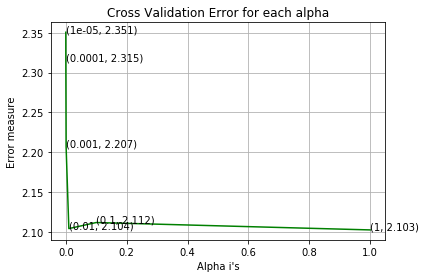

For values of best alpha =  1 The train log loss is: 1.439760735599794
For values of best alpha =  1 The cross validation log loss is: 2.102751416006344
For values of best alpha =  1 The test log loss is: 1.9943850365737619


In [123]:
# Train a Logistic regression+Calibration model using text features whicha re tfidf vectorizer
alpha = [10 ** x for x in range(-5, 1)]

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.


cv_log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_text_feature_tfidfVectorizer_1, y_train)
    
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_text_feature_tfidfVectorizer_1, y_train)
    predict_y = sig_clf.predict_proba(cv_text_feature_tfidfVectorizer_1)
    cv_log_error_array.append(log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_text_feature_tfidfVectorizer_1, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_text_feature_tfidfVectorizer_1, y_train)

predict_y = sig_clf.predict_proba(train_text_feature_tfidfVectorizer_1)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_text_feature_tfidfVectorizer_1)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_text_feature_tfidfVectorizer_1)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


**Q. Is the Text feature stable across all the data sets (Test, Train, Cross validation)?**

In [124]:
def get_intersec_text(df):
    df_text_vec = TfidfVectorizer(min_df=3)
    df_text_fea = df_text_vec.fit_transform(df['Text'])
    df_text_features = df_text_vec.get_feature_names()

    df_text_fea_counts = df_text_fea.sum(axis=0).A1
    df_text_fea_dict = dict(zip(list(df_text_features),df_text_fea_counts))
    len1 = len(set(df_text_features))
    len2 = len(set(train_text_features) & set(df_text_features))
    return len1,len2

In [125]:
len1,len2 = get_intersec_text(X_test)
print(np.round((len2/len1)*100, 3), "% of word of test data appeared in train data")
len1,len2 = get_intersec_text(X_cv)
print(np.round((len2/len1)*100, 3), "% of word of Cross Validation appeared in train data")

98.196 % of word of test data appeared in train data
98.732 % of word of Cross Validation appeared in train data


**Observation:**
* The text feature is Stable across all the Train, test and Cross Validation.

### Machine Learning Models

In [126]:
#Data preparation for ML models.

#Misc. functionns for ML models

def predict_and_plot_confusion_matrix(train_x, train_y, test_x, test_y, clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    pred_y = sig_clf.predict(test_x)

    # for calculating log_loss we willl provide the array of probabilities belongs to each class
    print("Log loss :",log_loss(test_y, sig_clf.predict_proba(test_x)))
    # calculating the number of data points that are misclassified
    print("Number of mis-classified points :", np.count_nonzero((pred_y- test_y))/test_y.shape[0])
    plot_confusion_matrix(test_y, pred_y)

In [127]:
def report_log_loss(train_x, train_y, test_x, test_y,  clf):
    clf.fit(train_x, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x, train_y)
    sig_clf_probs = sig_clf.predict_proba(test_x)
    return log_loss(test_y, sig_clf_probs, eps=1e-15)

In [128]:
# This function will be used just for naive bayes
# for the given indices, we will print the name of the features
# and we will check whether the feature present in the test point text or not
def get_impfeature_names(indices, text, gene, var, no_features):
    gene_tfidf_vec = TfidfVectorizer()
    var_tfidf_vec = TfidfVectorizer()
    text_tfidf_vec = TfidfVectorizer(min_df=3)
    
    gene_vec = gene_tfidf_vec.fit(X_train['Gene'])
    var_vec  = var_tfidf_vec.fit(X_train['Variation'])
    text_vec = text_tfidf_vec.fit(X_train['Text'])
    
    fea1_len = len(gene_vec.get_feature_names())
    fea2_len = len(var_tfidf_vec.get_feature_names())
    
    word_present = 0
    for i,v in enumerate(indices):
        if (v < fea1_len):
            word = gene_vec.get_feature_names()[v]
            yes_no = True if word == gene else False
            if yes_no:
                word_present += 1
                print(i, "Gene feature [{}] present in test data point [{}]".format(word,yes_no))
        elif (v < fea1_len+fea2_len):
            word = var_vec.get_feature_names()[v-(fea1_len)]
            yes_no = True if word == var else False
            if yes_no:
                word_present += 1
                print(i, "variation feature [{}] present in test data point [{}]".format(word,yes_no))
        else:
            word = text_vec.get_feature_names()[v-(fea1_len+fea2_len)]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
                print(i, "Text feature [{}] present in test data point [{}]".format(word,yes_no))

    print("Out of the top ",no_features," features ", word_present, "are present in query point")

### Stacking Three Features

In [129]:
from scipy.sparse import hstack
# merging gene, variance and text features

# building train, test and cross validation data sets
# a = [[1, 2], 
#      [3, 4]]
# b = [[4, 5], 
#      [6, 7]]
# hstack(a, b) = [[1, 2, 4, 5],
#                [ 3, 4, 6, 7]]

#TfidfVectorizer
train_gene_var_tfidfVectorizer = hstack((train_gene_feature_tfidfVectorizer,train_variation_feature_tfidfVectorizer))
test_gene_var_tfidfVectorizer = hstack((test_gene_feature_tfidfVectorizer,test_variation_feature_tfidfVectorizer))
cv_gene_var_tfidfVectorizer = hstack((cv_gene_feature_tfidfVectorizer,cv_variation_feature_tfidfVectorizer))

train_x_tfidfVectorizer = hstack((train_gene_var_tfidfVectorizer, train_text_feature_tfidfVectorizer_1)).tocsr()
train_y = np.array(list(X_train['Class']))

test_x_tfidfVectorizer = hstack((test_gene_var_tfidfVectorizer, test_text_feature_tfidfVectorizer_1)).tocsr()
test_y = np.array(list(X_test['Class']))

cv_x_tfidfVectorizer = hstack((cv_gene_var_tfidfVectorizer, cv_text_feature_tfidfVectorizer_1)).tocsr()
cv_y = np.array(list(X_cv['Class']))


In [130]:
print("TfidfVectorizer features :")
print("(number of data points * number of features) in train data = ", train_x_tfidfVectorizer.shape)
print("(number of data points * number of features) in test data = ", test_x_tfidfVectorizer.shape)
print("(number of data points * number of features) in cross validation data =", cv_x_tfidfVectorizer.shape)

TfidfVectorizer features :
(number of data points * number of features) in train data =  (2124, 3200)
(number of data points * number of features) in test data =  (665, 3200)
(number of data points * number of features) in cross validation data = (532, 3200)


### BaseLine Models

### Naive Bayes

#### Hyperparameter Tuning:

for alpha = 1e-05
Log Loss : 1.499118063341048
for alpha = 0.0001
Log Loss : 1.4812860740587979
for alpha = 0.001
Log Loss : 1.4578956013019615
for alpha = 0.1
Log Loss : 1.3686287466211342
for alpha = 1
Log Loss : 1.4520551414350902
for alpha = 10
Log Loss : 1.5804909038091564
for alpha = 100
Log Loss : 1.5377556278278082
for alpha = 1000
Log Loss : 1.5255345675017655


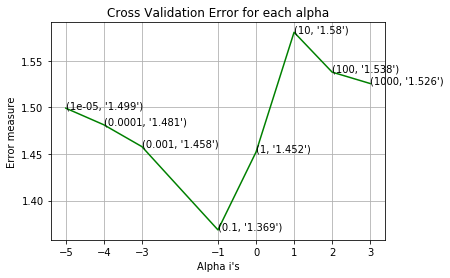

For values of best alpha =  0.1 The train log loss is: 0.6349476917081684
For values of best alpha =  0.1 The cross validation log loss is: 1.3686287466211342
For values of best alpha =  0.1 The test log loss is: 1.3326809377074729


In [131]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
from sklearn.naive_bayes import MultinomialNB

alpha = [0.00001, 0.0001, 0.001, 0.1, 1, 10, 100,1000]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = MultinomialNB(alpha=i)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(np.log10(alpha), cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (np.log10(alpha[i]),cv_log_error_array[i]))
plt.grid()
plt.xticks(np.log10(alpha))
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)


predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing Model with best HyperParameter

Log Loss : 1.3326809377074729
Number of missclassified point : 0.4755639097744361
-------------------------------------------------- Confusion Matrix --------------------------------------------------


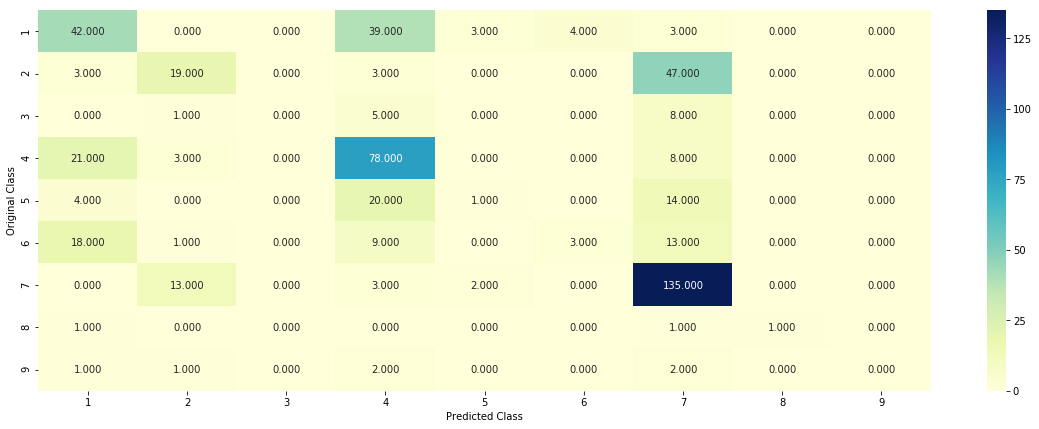

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


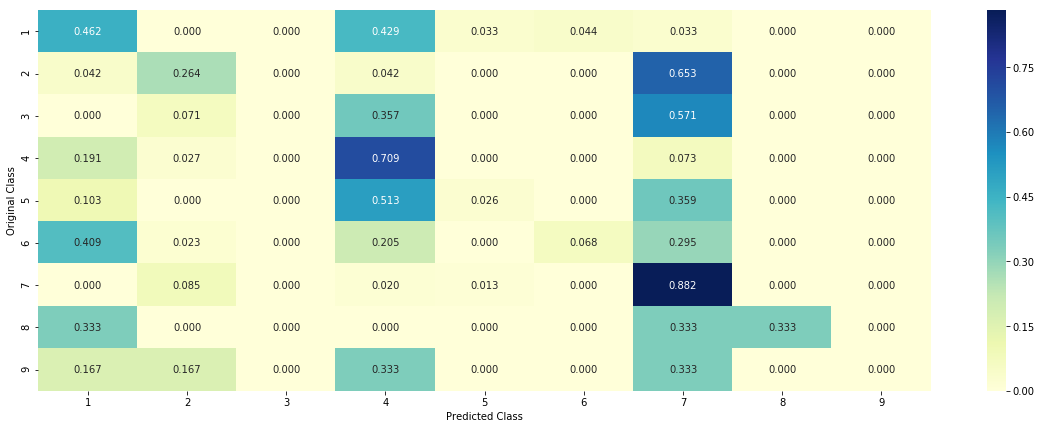

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


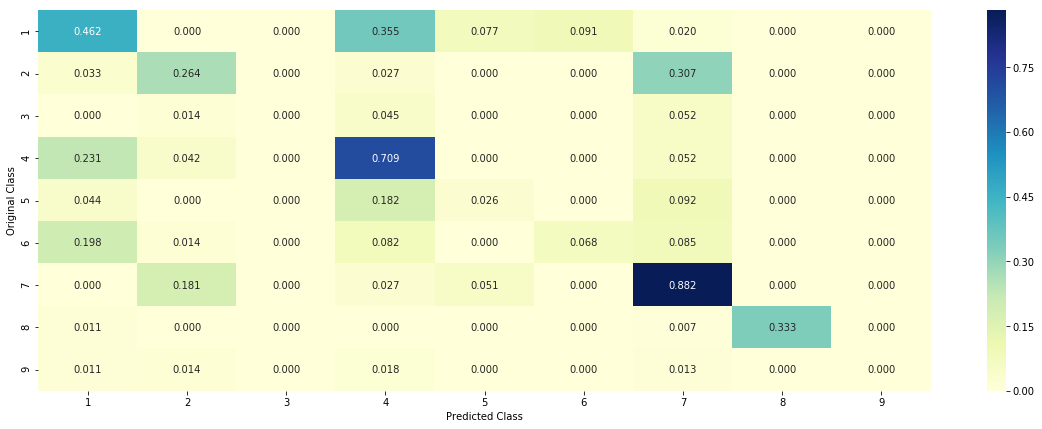

In [132]:
# find more about Multinomial Naive base function here http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
# -------------------------
# default paramters
# sklearn.naive_bayes.MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)

# some of methods of MultinomialNB()
# fit(X, y[, sample_weight])	Fit Naive Bayes classifier according to X, y
# predict(X)	Perform classification on an array of test vectors X.
# predict_log_proba(X)	Return log-probability estimates for the test vector X

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
# ----------------------------

clf = MultinomialNB(alpha=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf_probs = sig_clf.predict_proba(test_x_tfidfVectorizer)
# to avoid rounding error while multiplying probabilites we use log-probability estimates
print("Log Loss :",log_loss(test_y, sig_clf_probs))
print("Number of missclassified point :", np.count_nonzero((sig_clf.predict(cv_x_tfidfVectorizer)- cv_y))/cv_y.shape[0])
plot_confusion_matrix(cv_y, sig_clf.predict(cv_x_tfidfVectorizer.toarray()))

#### Feature Importance, Query Point-1

In [133]:
test_point_index = 131
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.1666 0.0546 0.0322 0.5848 0.0427 0.0422 0.066  0.0054 0.0053]]
Actual Class : 4
--------------------------------------------------
Out of the top  100  features  0 are present in query point


#### Feature Importance, Query Point-2

In [138]:
test_point_index = 50
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0728 0.1338 0.0256 0.1554 0.0524 0.1013 0.4458 0.0065 0.0064]]
Actual Class : 7
--------------------------------------------------
Out of the top  100  features  0 are present in query point


### K-Nearest Neighbour Classifier

#### HyperParameter Tuning

for alpha = 5
Log Loss : 1.4086832932517355
for alpha = 11
Log Loss : 1.4079425235854905
for alpha = 15
Log Loss : 1.4045178813178045
for alpha = 21
Log Loss : 1.4089546219318827
for alpha = 31
Log Loss : 1.4121495689676455
for alpha = 41
Log Loss : 1.4208610425563475
for alpha = 51
Log Loss : 1.4359153323981642
for alpha = 99
Log Loss : 1.4890804573205898


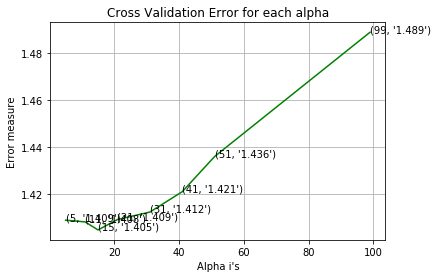

For values of best alpha =  15 The train log loss is: 1.0558093198681073
For values of best alpha =  15 The cross validation log loss is: 1.4045178813178045
For values of best alpha =  15 The test log loss is: 1.2767520744527865


In [139]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification.
from sklearn.neighbors import KNeighborsClassifier
alpha = [5, 11, 15, 21, 31, 41, 51, 99]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))


#### Testing the Model with best hyperparameter

Log loss : 1.4045178813178045
Number of mis-classified points : 0.5075187969924813
-------------------------------------------------- Confusion Matrix --------------------------------------------------


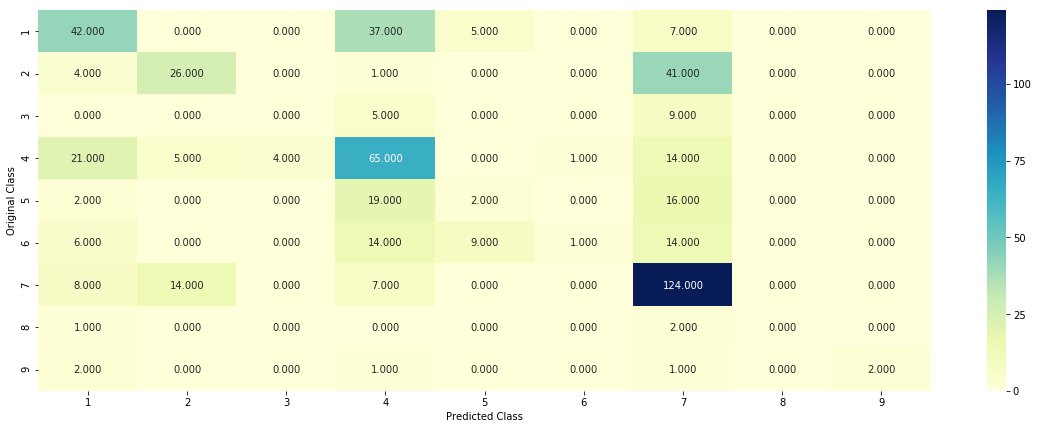

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


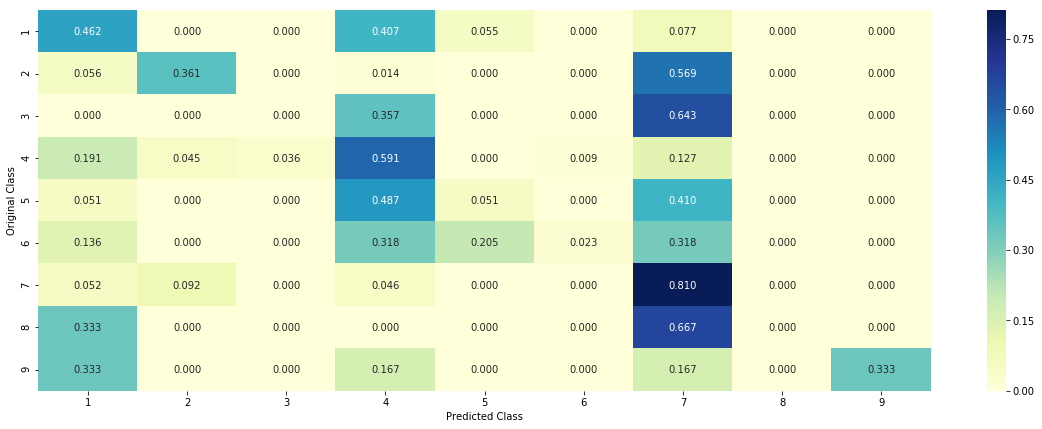

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


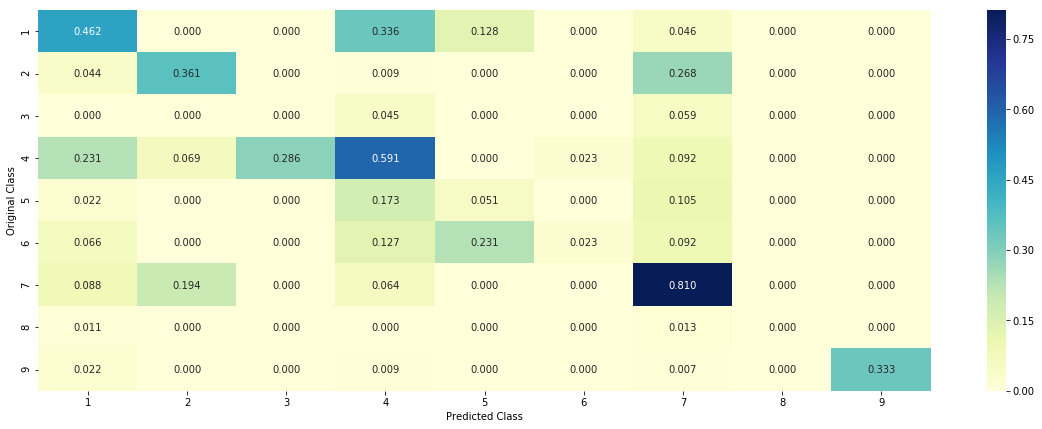

In [140]:
# find more about KNeighborsClassifier() here http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
# -------------------------
# default parameter
# KNeighborsClassifier(n_neighbors=5, weights=’uniform’, algorithm=’auto’, leaf_size=30, p=2, 
# metric=’minkowski’, metric_params=None, n_jobs=1, **kwargs)

# methods of
# fit(X, y) : Fit the model using X as training data and y as target values
# predict(X):Predict the class labels for the provided data
# predict_proba(X):Return probability estimates for the test data X.
#---------------------------------------------------------------------------
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, train_y, cv_x_tfidfVectorizer, cv_y, clf)

#### Sample Query Point-1

In [141]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha])
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

test_point_index = 1
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_tfidfVectorizer[test_point_index], alpha[best_alpha])
print("The ",alpha[best_alpha]," nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 7
Actual Class : 2
The  15  nearest neighbours of the test points belongs to classes [7 7 7 2 2 2 5 5 5 7 7 7 7 5 7]
Fequency of nearest points : Counter({7: 8, 5: 4, 2: 3})


#### Sample Query Point-2

In [142]:
clf = KNeighborsClassifier(n_neighbors=alpha[best_alpha], algorithm='brute')
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

test_point_index = 100

predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Actual Class :", test_y[test_point_index])
neighbors = clf.kneighbors(test_x_tfidfVectorizer[test_point_index], alpha[best_alpha])
print("the k value for knn is",alpha[best_alpha],"and the nearest neighbours of the test points belongs to classes",train_y[neighbors[1][0]])
print("Fequency of nearest points :",Counter(train_y[neighbors[1][0]]))

Predicted Class : 3
Actual Class : 4
the k value for knn is 15 and the nearest neighbours of the test points belongs to classes [5 4 4 4 1 3 3 3 3 3 4 4 3 1 4]
Fequency of nearest points : Counter({4: 6, 3: 6, 1: 2, 5: 1})


### Logistic Regression(With Class balancing)

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.5626922144980262
for alpha = 1e-05
Log Loss : 1.503962053583318
for alpha = 0.0001
Log Loss : 1.3273777817946681
for alpha = 0.001
Log Loss : 1.3013455946054253
for alpha = 0.01
Log Loss : 1.4428173843346273
for alpha = 0.1
Log Loss : 1.7069772031946018
for alpha = 1
Log Loss : 1.7850105765395141
for alpha = 10
Log Loss : 1.7964837634145152
for alpha = 100
Log Loss : 1.7978801809475138


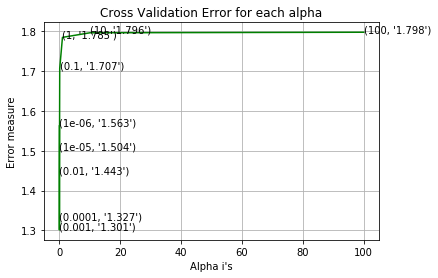

For values of best alpha =  0.001 The train log loss is: 0.7224595675532359
For values of best alpha =  0.001 The cross validation log loss is: 1.3013455946054253
For values of best alpha =  0.001 The test log loss is: 1.158111101101321


In [143]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# -------------------------------------------------------------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------------------------------------------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#---------------------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 3)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(class_weight='balanced', alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    # to avoid rounding error while multiplying probabilites we use log-probability estimates
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing the Model with best hyperParameter

Log loss : 1.3013455946054253
Number of mis-classified points : 0.4718045112781955
-------------------------------------------------- Confusion Matrix --------------------------------------------------


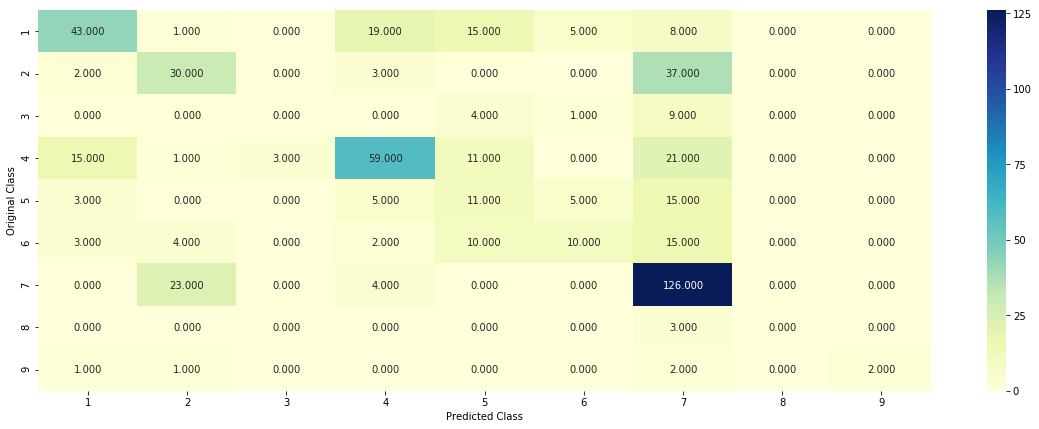

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


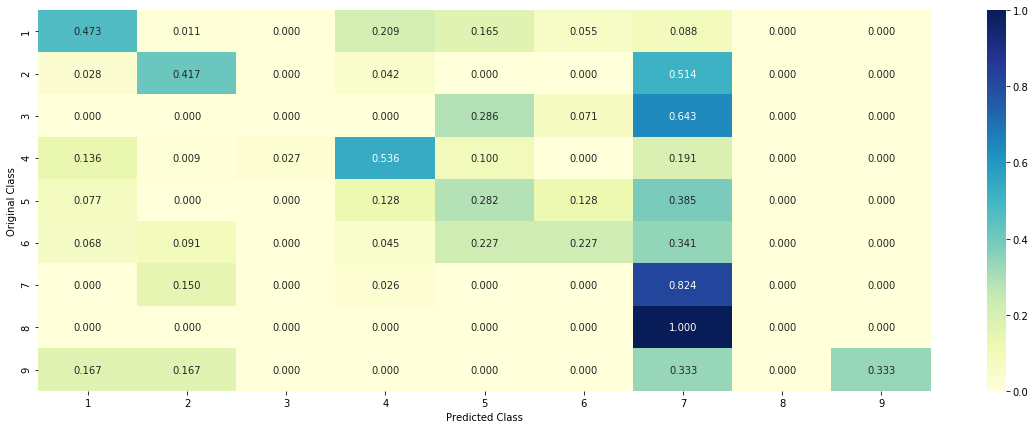

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


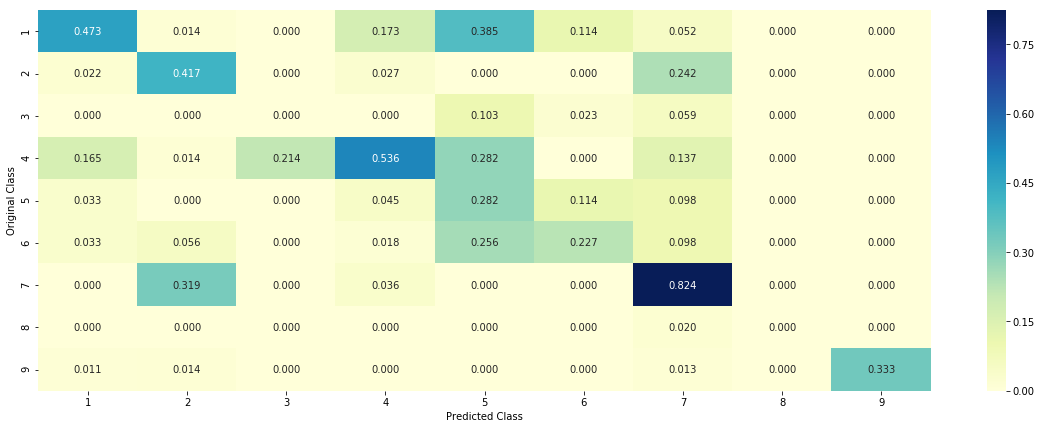

In [144]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)
# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/geometric-intuition-1/
#------------------------------
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, train_y, cv_x_tfidfVectorizer, cv_y, clf)

#### Feature Importance

In [145]:
def get_imp_feature_names(text, indices, removed_ind = []):
    word_present = 0
    tabulte_list = []
    incresingorder_ind = 0
    for i in indices:
        if i < train_gene_feature_tfidfVectorizer.shape[1]:
            tabulte_list.append([incresingorder_ind, "Gene", "Yes"])
        elif i< 18:
            tabulte_list.append([incresingorder_ind,"Variation", "Yes"])
        if ((i > 17) & (i not in removed_ind)) :
            word = train_text_features[i]
            yes_no = True if word in text.split() else False
            if yes_no:
                word_present += 1
            tabulte_list.append([incresingorder_ind,train_text_features[i], yes_no])
        incresingorder_ind += 1
    print(word_present, "most importent features are present in our query point")
    print("-"*50)
    print("The features that are most importent of the ",predicted_cls[0]," class:")
    print (tabulate(tabulte_list, headers=["Index",'Feature name', 'Present or Not']))

#### Incorrectly Classified Point

In [146]:
# from tabulate import tabulate
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer,train_y)
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[0.0906 0.0809 0.3474 0.2316 0.1011 0.0344 0.0993 0.009  0.0058]]
Actual Class : 4
--------------------------------------------------
96 Text feature [100] present in test data point [True]
147 Text feature [000] present in test data point [True]
261 Text feature [11] present in test data point [True]
264 Text feature [12] present in test data point [True]
324 Text feature [10] present in test data point [True]
Out of the top  500  features  5 are present in query point


#### Correctly Classified Point

In [147]:
test_point_index = 122
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 4
Predicted Class Probabilities: [[0.2494 0.1434 0.0147 0.2709 0.1071 0.0368 0.1637 0.011  0.0029]]
Actual Class : 4
--------------------------------------------------
39 Text feature [1335] present in test data point [True]
136 Text feature [1150] present in test data point [True]
387 Text feature [06] present in test data point [True]
406 Text feature [125] present in test data point [True]
Out of the top  500  features  4 are present in query point


### Logistic Regression(Without Class balancing) 

#### HyperParameter Tuning

for alpha = 1e-06
Log Loss : 1.5586409492508821
for alpha = 1e-05
Log Loss : 1.532878566449095
for alpha = 0.0001
Log Loss : 1.3526662332584451
for alpha = 0.001
Log Loss : 1.315914369570112
for alpha = 0.01
Log Loss : 1.4394916294237905
for alpha = 0.1
Log Loss : 1.7636155644286649
for alpha = 1
Log Loss : 1.8574752522167262


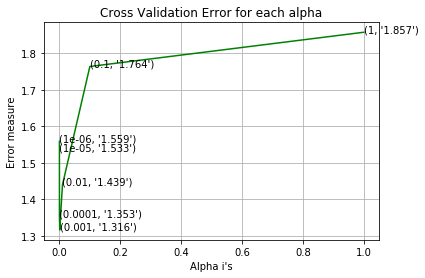

For values of best alpha =  0.001 The train log loss is: 0.7334715149320528
For values of best alpha =  0.001 The cross validation log loss is: 1.315914369570112
For values of best alpha =  0.001 The test log loss is: 1.1749851648321707


In [148]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------------------------------------------

alpha = [10 ** x for x in range(-6, 1)]
cv_log_error_array = []
for i in alpha:
    print("for alpha =", i)
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.315914369570112
Number of mis-classified points : 0.44548872180451127
-------------------------------------------------- Confusion Matrix --------------------------------------------------


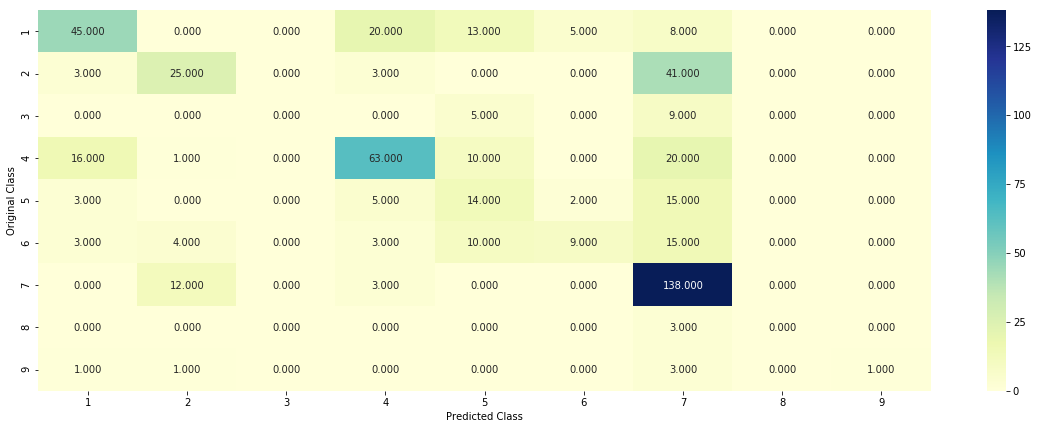

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


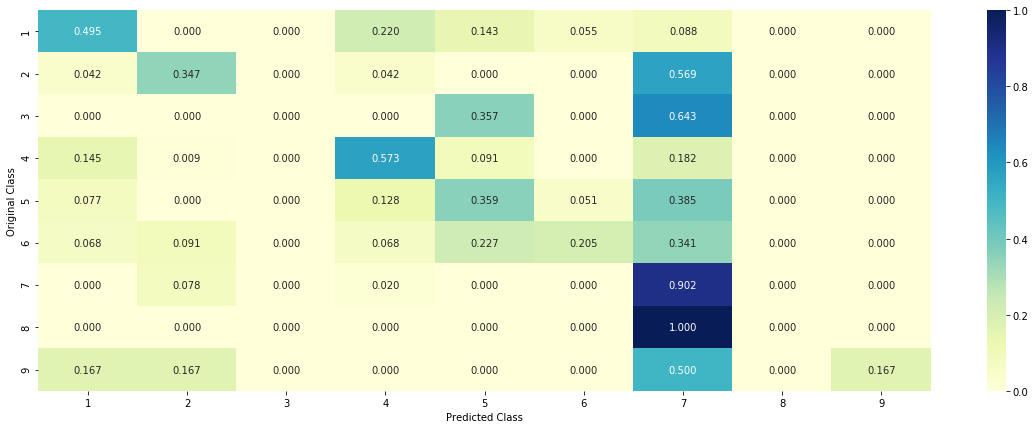

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


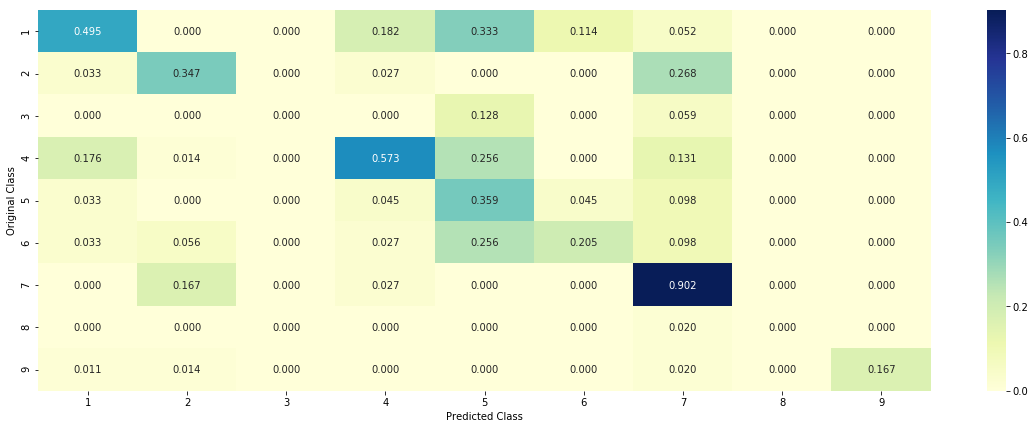

In [149]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.
#------------------------------------------------------------------------------------------------

clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, train_y, cv_x_tfidfVectorizer, cv_y, clf)

#### Feature Importance, Correctly Classified Point

In [150]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(train_x_tfidfVectorizer,train_y)
test_point_index = 90
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 7
Predicted Class Probabilities: [[0.0812 0.1397 0.0221 0.1259 0.0447 0.041  0.5313 0.0084 0.0057]]
Actual Class : 7
--------------------------------------------------
153 Text feature [115150] present in test data point [True]
Out of the top  500  features  1 are present in query point


#### Feature Importance, Query Point

In [156]:
test_point_index = 134
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 5
Predicted Class Probabilities: [[0.1435 0.0577 0.0079 0.1527 0.4403 0.1356 0.0458 0.0163 0.    ]]
Actual Class : 5
--------------------------------------------------
213 Text feature [11] present in test data point [True]
288 Text feature [117] present in test data point [True]
Out of the top  500  features  2 are present in query point


### Linear SVM

#### HyperParameter Tuning

for C = 1e-05
Log Loss : 1.523810154558757
for C = 0.0001
Log Loss : 1.4909534778412543
for C = 0.001
Log Loss : 1.4495756506162858
for C = 0.01
Log Loss : 1.4892937176466137
for C = 0.1
Log Loss : 1.820448237527706
for C = 1
Log Loss : 1.798291109161048
for C = 10
Log Loss : 1.7982909567037046
for C = 100
Log Loss : 1.7982909524169002


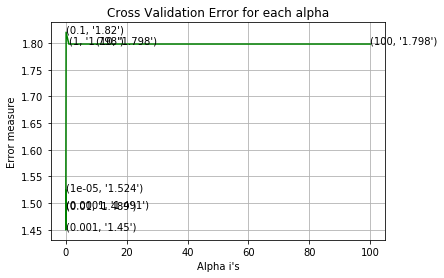

For values of best alpha =  0.001 The train log loss is: 0.611749230813836
For values of best alpha =  0.001 The cross validation log loss is: 1.4495756506162858
For values of best alpha =  0.001 The test log loss is: 1.3221779401131712


In [157]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# -----------------------------------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#----------------------------------------------------------------------------------

alpha = [10 ** x for x in range(-5, 3)]
cv_log_error_array = []
for i in alpha:
    print("for C =", i)
#     clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
    clf = SGDClassifier( class_weight='balanced', alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(train_x_tfidfVectorizer, train_y)
    sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
    cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
    print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

fig, ax = plt.subplots()
ax.plot(alpha, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[i],str(txt)), (alpha[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(cv_log_error_array)
# clf = SVC(C=i,kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(class_weight='balanced', alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

#### Testing Model with best HyperParameter

Log loss : 1.4495756506162858
Number of mis-classified points : 0.4755639097744361
-------------------------------------------------- Confusion Matrix --------------------------------------------------


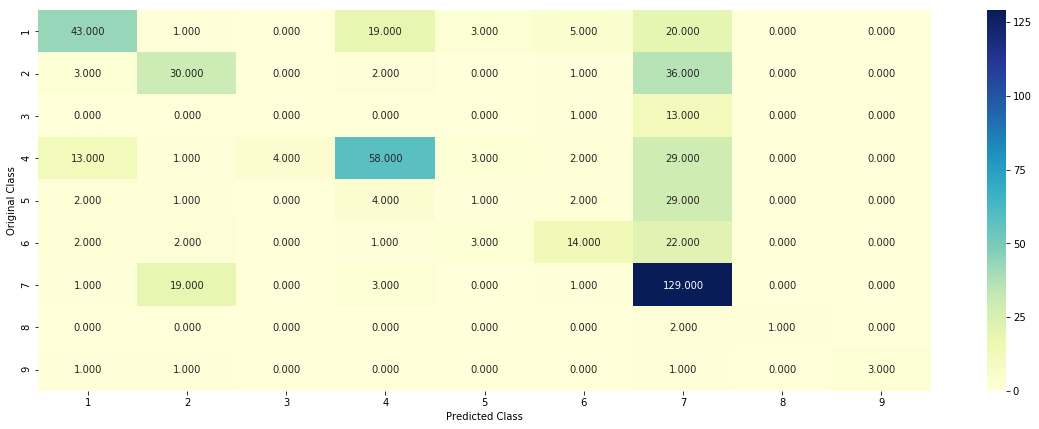

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


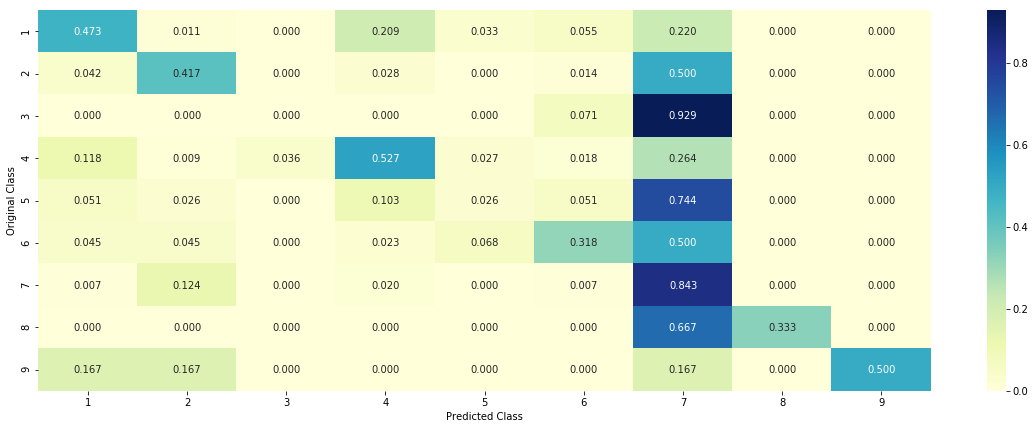

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


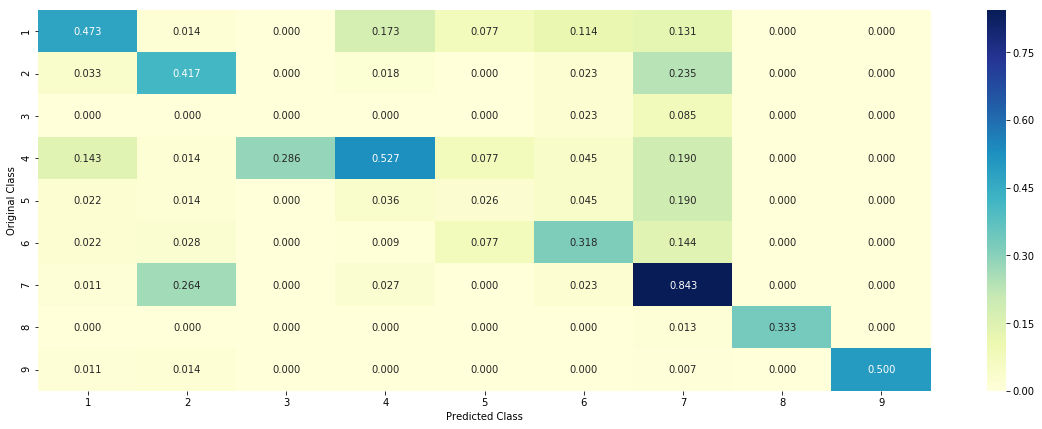

In [158]:
# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html

# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.

# clf = SVC(C=alpha[best_alpha],kernel='linear',probability=True, class_weight='balanced')
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42,class_weight='balanced')
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, train_y,cv_x_tfidfVectorizer,cv_y, clf)

#### Feature Importance, Correctly Classified Point

In [159]:
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf.fit(train_x_tfidfVectorizer,train_y)
#test_point_index = 1
test_point_index = 110
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 9
Predicted Class Probabilities: [[0.037  0.0494 0.0085 0.0654 0.0293 0.0131 0.1962 0.0054 0.5958]]
Actual Class : 9
--------------------------------------------------
19 Text feature [02] present in test data point [True]
51 Text feature [1177] present in test data point [True]
56 Text feature [101] present in test data point [True]
96 Text feature [11division] present in test data point [True]
97 Text feature [12q13] present in test data point [True]
99 Text feature [108] present in test data point [True]
122 Text feature unich] present in test data point [True]
Out of the top  500  features  7 are present in query point


#### Incorrectly classified point

In [160]:
test_point_index = 100
no_feature = 500
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.coef_)[predicted_cls-1][:,:no_feature]
print("-"*50)
get_impfeature_names(indices[0], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index],X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 3
Predicted Class Probabilities: [[0.079  0.0946 0.4358 0.1029 0.1099 0.0335 0.1334 0.0069 0.0042]]
Actual Class : 4
--------------------------------------------------
90 Text feature [100] present in test data point [True]
125 Text feature [10] present in test data point [True]
191 Text feature [000] present in test data point [True]
297 Text feature [11] present in test data point [True]
Out of the top  500  features  4 are present in query point


### Random Forest Classifier

#### HyperParameter Tuning (Tfidf Vectorizer)

In [161]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).


# find more about CalibratedClassifierCV here at http://scikit-learn.org/stable/modules/generated/sklearn.calibration.CalibratedClassifierCV.html
# ----------------------------
# default paramters
# sklearn.calibration.CalibratedClassifierCV(base_estimator=None, method=’sigmoid’, cv=3)
#
# some of the methods of CalibratedClassifierCV()
# fit(X, y[, sample_weight])	Fit the calibrated model
# get_params([deep])	Get parameters for this estimator.
# predict(X)	Predict the target of new samples.
# predict_proba(X)	Posterior probabilities of classification
#-------------------------------------
# video link:
#-------------------------------------
from sklearn.ensemble import RandomForestClassifier
alpha = [100,200,500,1000,2000]
max_depth = [5, 10]
cv_log_error_array = []
for i in alpha:
    for j in max_depth:
        print("for n_estimators =", i,"and max depth = ", j)
        clf = RandomForestClassifier(n_estimators=i, criterion='gini', max_depth=j, random_state=42, n_jobs=-1)
        clf.fit(train_x_tfidfVectorizer, train_y)
        sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
        sig_clf.fit(train_x_tfidfVectorizer, train_y)
        sig_clf_probs = sig_clf.predict_proba(cv_x_tfidfVectorizer)
        cv_log_error_array.append(log_loss(cv_y, sig_clf_probs, labels=clf.classes_, eps=1e-15))
        print("Log Loss :",log_loss(cv_y, sig_clf_probs)) 

'''fig, ax = plt.subplots()
features = np.dot(np.array(alpha)[:,None],np.array(max_depth)[None]).ravel()
ax.plot(features, cv_log_error_array,c='g')
for i, txt in enumerate(np.round(cv_log_error_array,3)):
    ax.annotate((alpha[int(i/2)],max_depth[int(i%2)],str(txt)), (features[i],cv_log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()
'''

best_alpha = np.argmin(cv_log_error_array)
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

predict_y = sig_clf.predict_proba(train_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(cv_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The cross validation log loss is:",log_loss(y_cv, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(test_x_tfidfVectorizer)
print('For values of best estimator = ', alpha[int(best_alpha/2)], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

for n_estimators = 100 and max depth =  5
Log Loss : 1.847777300551242
for n_estimators = 100 and max depth =  10
Log Loss : 1.8447908985223973
for n_estimators = 200 and max depth =  5
Log Loss : 1.8285918253405469
for n_estimators = 200 and max depth =  10
Log Loss : 1.8427380011491326
for n_estimators = 500 and max depth =  5
Log Loss : 1.8328273774290986
for n_estimators = 500 and max depth =  10
Log Loss : 1.8565150674072848
for n_estimators = 1000 and max depth =  5
Log Loss : 1.8491450973199002
for n_estimators = 1000 and max depth =  10
Log Loss : 1.8603383989442113
for n_estimators = 2000 and max depth =  5
Log Loss : 1.8462719398230871
for n_estimators = 2000 and max depth =  10
Log Loss : 1.8586858734318434
For values of best estimator =  200 The train log loss is: 0.8988942691214021
For values of best estimator =  200 The cross validation log loss is: 1.828591825340547
For values of best estimator =  200 The test log loss is: 1.8620241203123045


#### Testing the Model with best HyperParameter(Tfidf Vectorizer)

Log loss : 1.8285918253405469
Number of mis-classified points : 0.7255639097744361
-------------------------------------------------- Confusion Matrix --------------------------------------------------


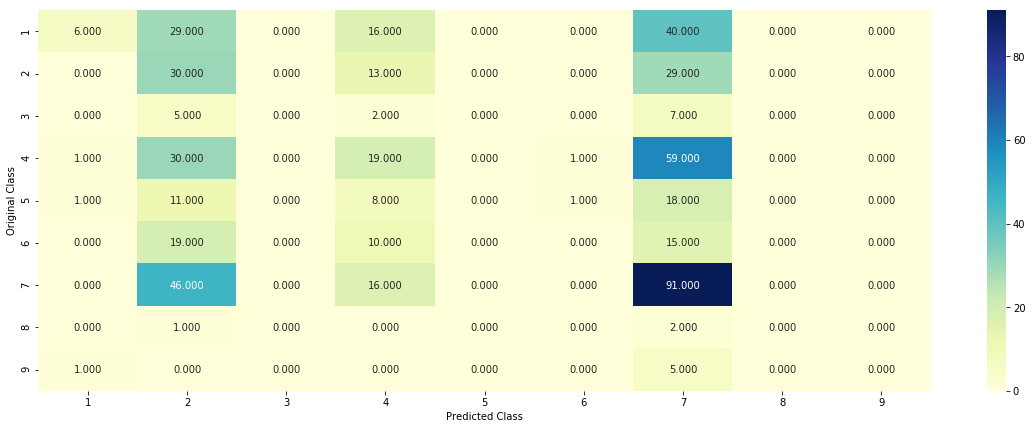

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


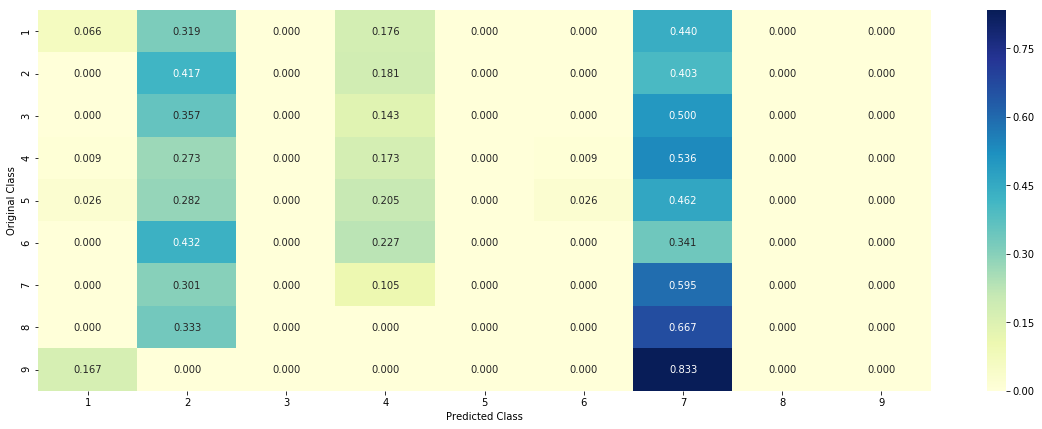

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


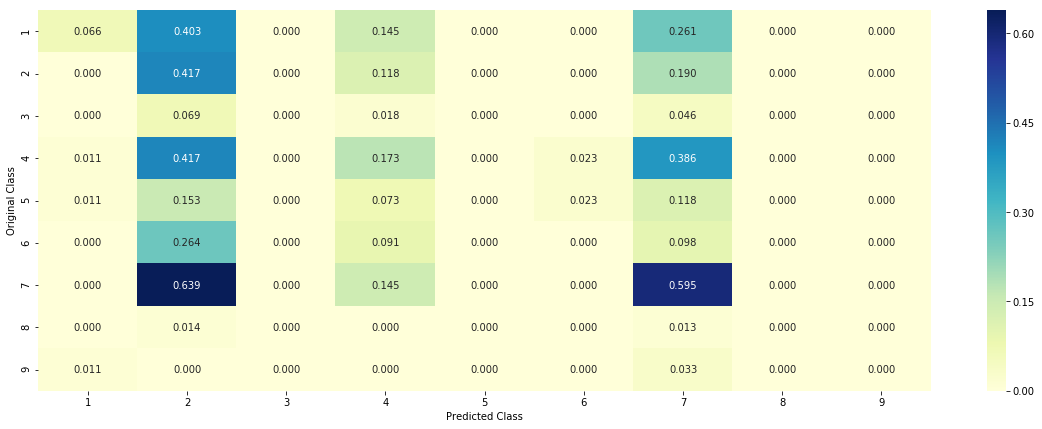

In [162]:
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
predict_and_plot_confusion_matrix(train_x_tfidfVectorizer, train_y,cv_x_tfidfVectorizer,cv_y, clf)

#### Feature Importance, Sample Query Point-1

In [163]:
# test_point_index = 10
clf = RandomForestClassifier(n_estimators=alpha[int(best_alpha/2)], criterion='gini', max_depth=max_depth[int(best_alpha%2)], random_state=42, n_jobs=-1)
clf.fit(train_x_tfidfVectorizer, train_y)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(train_x_tfidfVectorizer, train_y)

test_point_index = 1
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actual Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index], X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0896 0.3229 0.0212 0.1535 0.0729 0.0855 0.2448 0.0064 0.0033]]
Actual Class : 2
--------------------------------------------------
1 Text feature [04] present in test data point [True]
27 Text feature [000] present in test data point [True]
28 Text feature [001] present in test data point [True]
96 Text feature [08] present in test data point [True]
Out of the top  100  features  4 are present in query point


#### Sample Query Point-2

In [164]:
test_point_index = 100
no_feature = 100
predicted_cls = sig_clf.predict(test_x_tfidfVectorizer[test_point_index])
print("Predicted Class :", predicted_cls[0])
print("Predicted Class Probabilities:", np.round(sig_clf.predict_proba(test_x_tfidfVectorizer[test_point_index]),4))
print("Actuall Class :", test_y[test_point_index])
indices = np.argsort(-clf.feature_importances_)
print("-"*50)
get_impfeature_names(indices[:no_feature], X_test['Text'].iloc[test_point_index],X_test['Gene'].iloc[test_point_index], X_test['Variation'].iloc[test_point_index], no_feature)

Predicted Class : 2
Predicted Class Probabilities: [[0.0979 0.2811 0.0256 0.1489 0.0772 0.1043 0.2124 0.049  0.0035]]
Actuall Class : 4
--------------------------------------------------
27 Text feature [000] present in test data point [True]
28 Text feature [001] present in test data point [True]
Out of the top  100  features  2 are present in query point


### Stack the Model

#### HyperParameter Tuning

In [165]:
# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#------------------------------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html
# --------------------------------
# default parameters 
# SVC(C=1.0, kernel=’rbf’, degree=3, gamma=’auto’, coef0=0.0, shrinking=True, probability=False, tol=0.001, 
# cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape=’ovr’, random_state=None)

# Some of methods of SVM()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# -------------------------------


# read more about support vector machines with linear kernals here http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# --------------------------------
# default parameters 
# sklearn.ensemble.RandomForestClassifier(n_estimators=10, criterion=’gini’, max_depth=None, min_samples_split=2, 
# min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=’auto’, max_leaf_nodes=None, min_impurity_decrease=0.0, 
# min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, 
# class_weight=None)

# Some of methods of RandomForestClassifier()
# fit(X, y, [sample_weight])	Fit the SVM model according to the given training data.
# predict(X)	Perform classification on samples in X.
# predict_proba (X)	Perform classification on samples in X.

# some of attributes of  RandomForestClassifier()
# feature_importances_ : array of shape = [n_features]
# The feature importances (the higher, the more important the feature).

# --------------------------------
from sklearn.linear_model import LogisticRegression
from mlxtend.classifier import StackingClassifier

clf1 = SGDClassifier(alpha=0.001, penalty='l2', loss='log', class_weight='balanced', random_state=0)
clf1.fit(train_x_tfidfVectorizer, train_y)
sig_clf1 = CalibratedClassifierCV(clf1, method="sigmoid")

clf2 = SGDClassifier(alpha=1, penalty='l2', loss='hinge', class_weight='balanced', random_state=0)
clf2.fit(train_x_tfidfVectorizer, train_y)
sig_clf2 = CalibratedClassifierCV(clf2, method="sigmoid")


clf3 = MultinomialNB(alpha=0.001)
clf3.fit(train_x_tfidfVectorizer, train_y)
sig_clf3 = CalibratedClassifierCV(clf3, method="sigmoid")

sig_clf1.fit(train_x_tfidfVectorizer, train_y)
print("Logistic Regression :  Log Loss: %0.2f" % (log_loss(cv_y, sig_clf1.predict_proba(cv_x_tfidfVectorizer))))
sig_clf2.fit(train_x_tfidfVectorizer, train_y)
print("Support vector machines : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf2.predict_proba(cv_x_tfidfVectorizer))))
sig_clf3.fit(train_x_tfidfVectorizer, train_y)
print("Naive Bayes : Log Loss: %0.2f" % (log_loss(cv_y, sig_clf3.predict_proba(cv_x_tfidfVectorizer))))
print("-"*50)
alpha = [0.0001,0.001,0.01,0.1,1,10] 
best_alpha = 999
for i in alpha:
    lr = LogisticRegression(C=i)
    sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
    sclf.fit(train_x_tfidfVectorizer, train_y)
    print("Stacking Classifer : for the value of alpha: %f Log Loss: %0.3f" % (i, log_loss(cv_y, sclf.predict_proba(cv_x_tfidfVectorizer))))
    log_error =log_loss(cv_y, sclf.predict_proba(cv_x_tfidfVectorizer))
    if best_alpha > log_error:
        best_alpha = log_error

Logistic Regression :  Log Loss: 1.30
Support vector machines : Log Loss: 1.80
Naive Bayes : Log Loss: 1.46
--------------------------------------------------
Stacking Classifer : for the value of alpha: 0.000100 Log Loss: 2.179
Stacking Classifer : for the value of alpha: 0.001000 Log Loss: 2.048
Stacking Classifer : for the value of alpha: 0.010000 Log Loss: 1.607
Stacking Classifer : for the value of alpha: 0.100000 Log Loss: 1.388
Stacking Classifer : for the value of alpha: 1.000000 Log Loss: 1.751
Stacking Classifer : for the value of alpha: 10.000000 Log Loss: 2.430


#### Testing Model with best HyperParameter

Log loss (train) on the stacking classifier : 0.5477096155154091
Log loss (CV) on the stacking classifier : 1.3880361458820762
Log loss (test) on the stacking classifier : 1.2967549756578456
Number of missclassified point : 0.43007518796992483
-------------------------------------------------- Confusion Matrix --------------------------------------------------


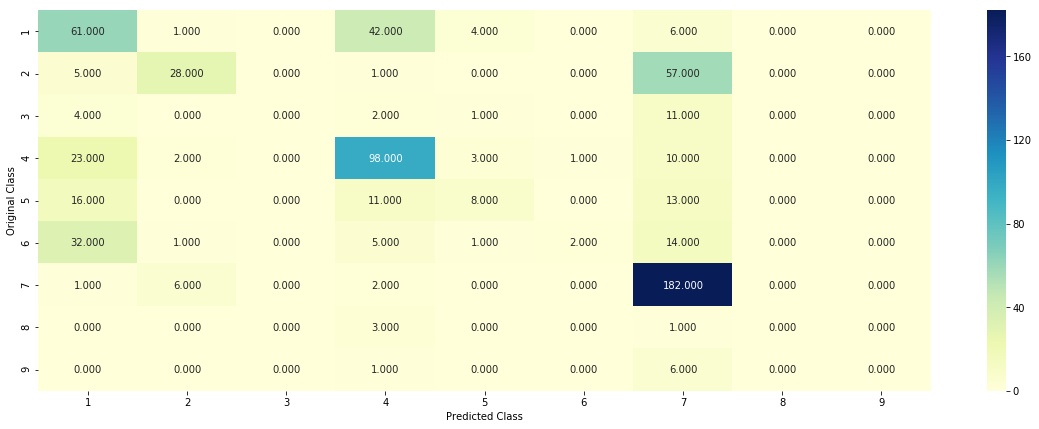

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


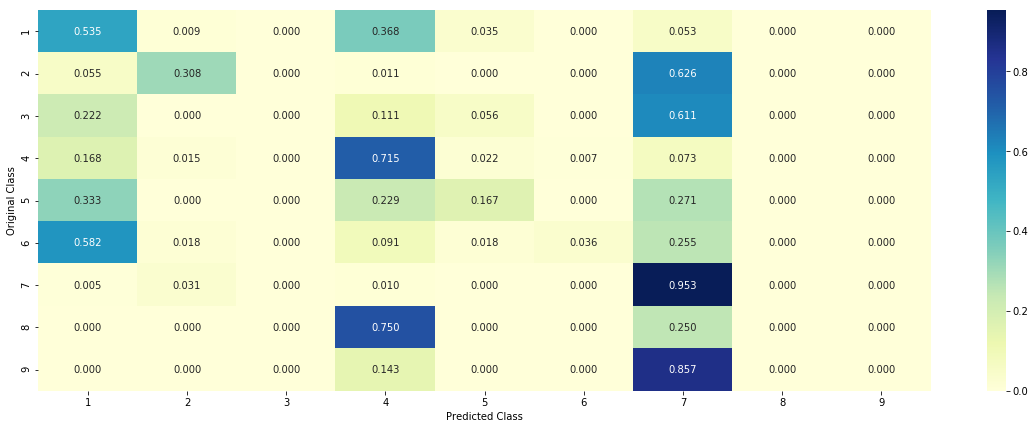

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


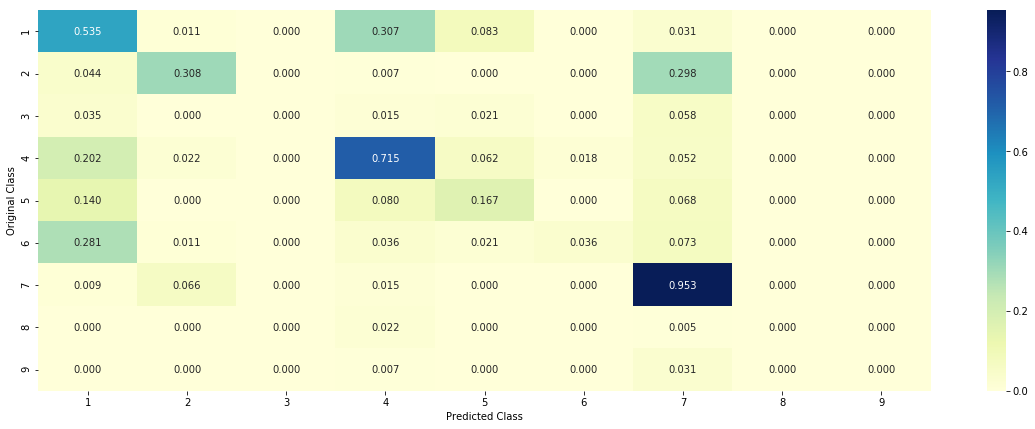

In [166]:
lr = LogisticRegression(C=0.1)
sclf = StackingClassifier(classifiers=[sig_clf1, sig_clf2, sig_clf3], meta_classifier=lr, use_probas=True)
sclf.fit(train_x_tfidfVectorizer, train_y)

log_error = log_loss(train_y, sclf.predict_proba(train_x_tfidfVectorizer))
print("Log loss (train) on the stacking classifier :",log_error)

log_error = log_loss(cv_y, sclf.predict_proba(cv_x_tfidfVectorizer))
print("Log loss (CV) on the stacking classifier :",log_error)

log_error = log_loss(test_y, sclf.predict_proba(test_x_tfidfVectorizer))
print("Log loss (test) on the stacking classifier :",log_error)

print("Number of missclassified point :", np.count_nonzero((sclf.predict(test_x_tfidfVectorizer)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=sclf.predict(test_x_tfidfVectorizer))

### Maximun Voting Classifier

Log loss (train) on the VotingClassifier : 0.8272186702922006
Log loss (CV) on the VotingClassifier : 1.3734020375290272
Log loss (test) on the VotingClassifier : 1.295621652520441
Number of missclassified point : 0.3924812030075188
-------------------------------------------------- Confusion Matrix --------------------------------------------------


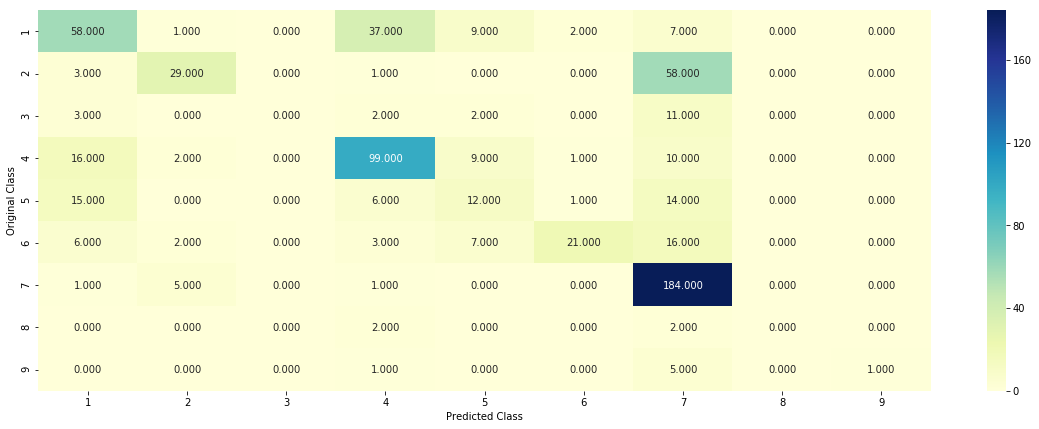

--------------------------------------------- Recall Matrix (Row Sum=1) ---------------------------------------------


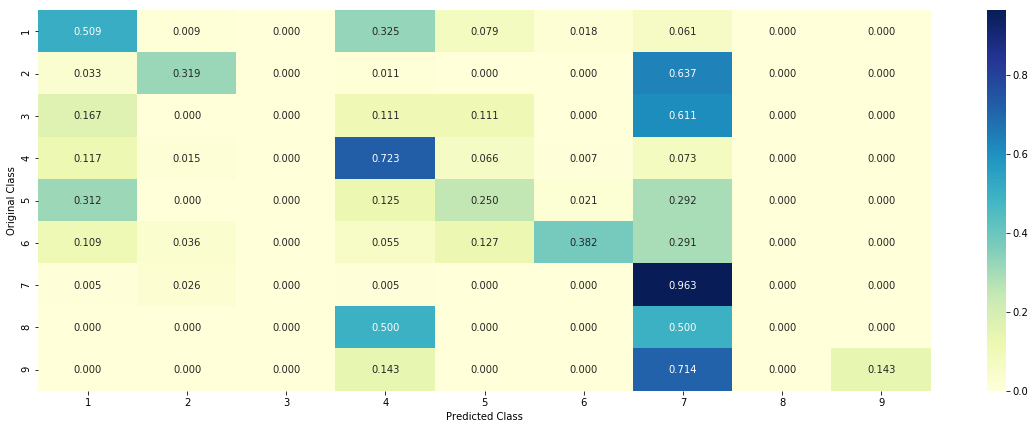

--------------------------------------------- Precision Matrix (Column Sum=1) ---------------------------------------------


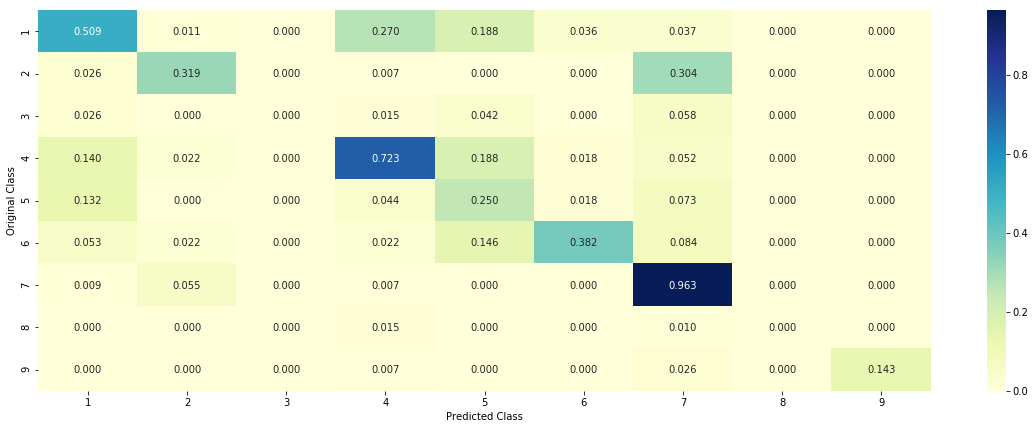

In [167]:
#Refer:http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html
from sklearn.ensemble import VotingClassifier
vclf = VotingClassifier(estimators=[('lr', sig_clf1), ('svc', sig_clf2), ('rf', sig_clf3)], voting='soft')
vclf.fit(train_x_tfidfVectorizer, train_y)
print("Log loss (train) on the VotingClassifier :", log_loss(train_y, vclf.predict_proba(train_x_tfidfVectorizer)))
print("Log loss (CV) on the VotingClassifier :", log_loss(cv_y, vclf.predict_proba(cv_x_tfidfVectorizer)))
print("Log loss (test) on the VotingClassifier :", log_loss(test_y, vclf.predict_proba(test_x_tfidfVectorizer)))
print("Number of missclassified point :", np.count_nonzero((vclf.predict(test_x_tfidfVectorizer)- test_y))/test_y.shape[0])
plot_confusion_matrix(test_y=test_y, predict_y=vclf.predict(test_x_tfidfVectorizer))